# 
# Problem 1- Bank Marketing Data Set


# 1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import math
from scipy.stats import skew

# Loading the data set

In [2]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

# Viewing the top 10 records

In [3]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


# Checking the shape and information of the dataframe

In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


# Checking the summary of the dataframe

In [6]:
df.describe(include='all')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# checking for missing values

In [7]:
df.isnull().sum() # There are no missing values in the data

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

# Check for duplicate records

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# Check for outliers

<AxesSubplot:>

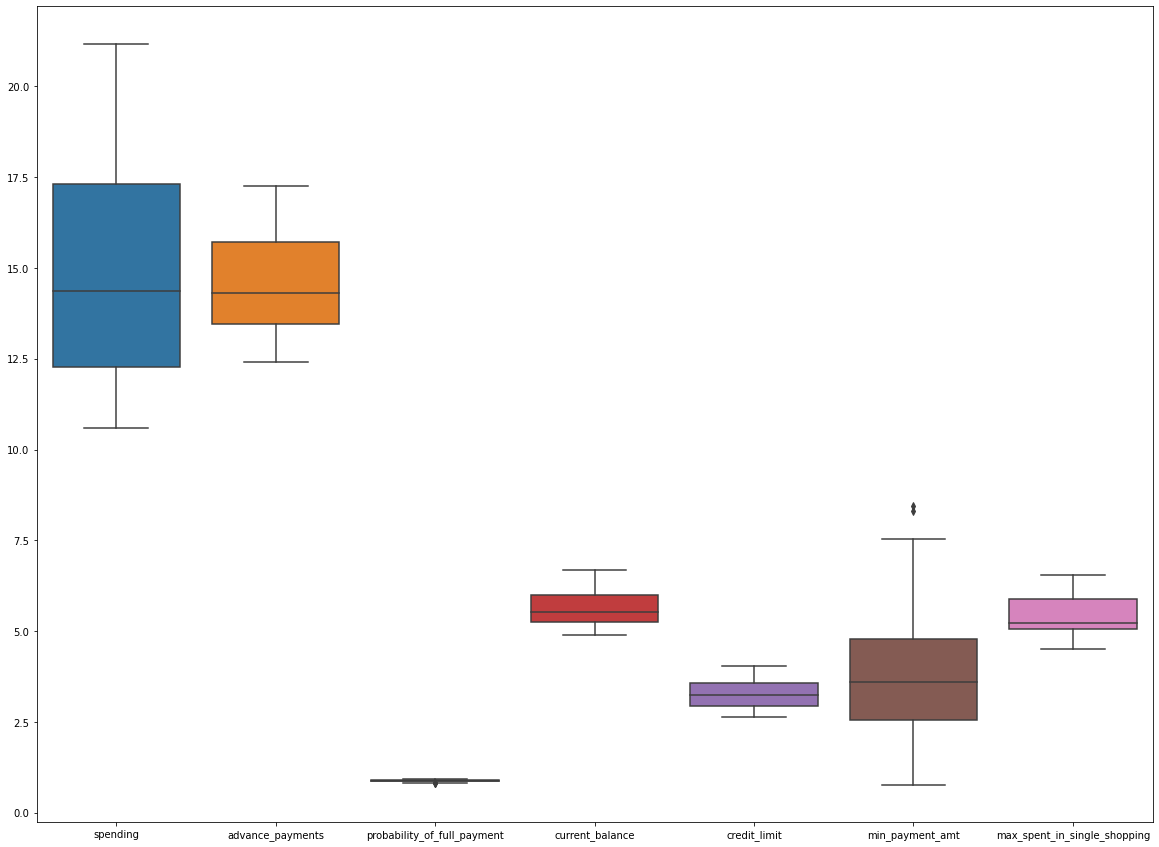

In [9]:
plt.figure(figsize=(20,15))
sns.boxplot(data = df)

# checking outliers for specific fields

<AxesSubplot:xlabel='probability_of_full_payment'>

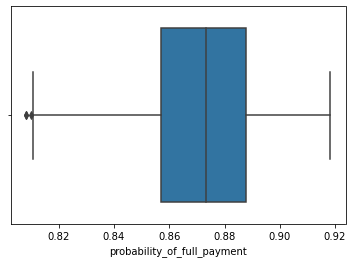

In [10]:
sns.boxplot(x ='probability_of_full_payment', data = df)

<AxesSubplot:xlabel='min_payment_amt'>

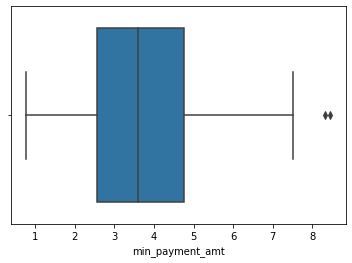

In [11]:
sns.boxplot(x ='min_payment_amt', data = df)

# Data Visualization
# Univariate Analysis


In [12]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [13]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print('')
    print('')  
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending
----------------------------------------------------------------------------


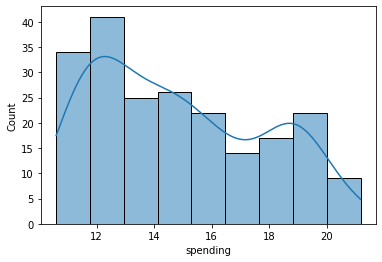

BoxPlot of spending
----------------------------------------------------------------------------


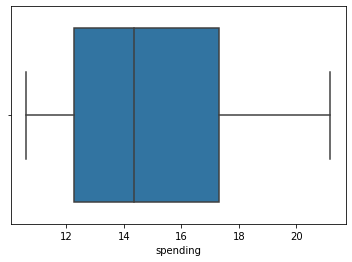

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments
----------------------------------------------------------------------------


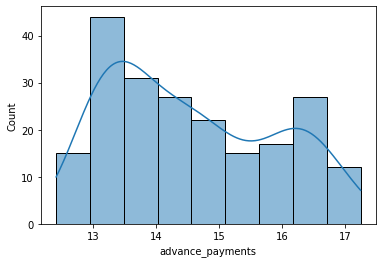

BoxPlot of advance_payments
----------------------------------------------------------------------------


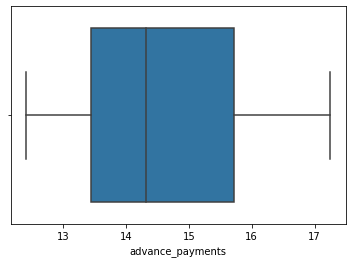

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


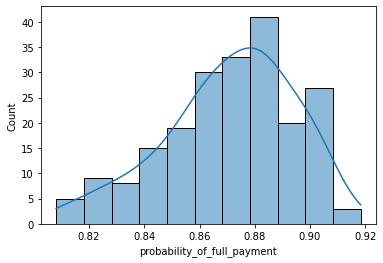

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


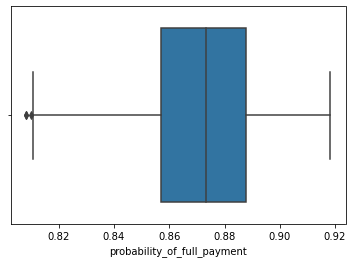

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance
----------------------------------------------------------------------------


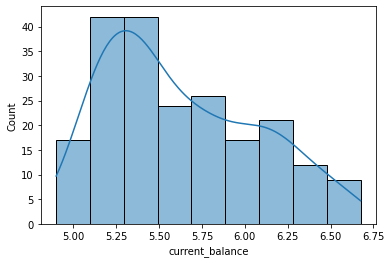

BoxPlot of current_balance
----------------------------------------------------------------------------


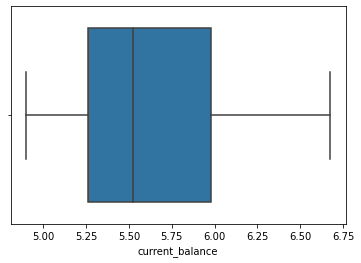

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit
----------------------------------------------------------------------------


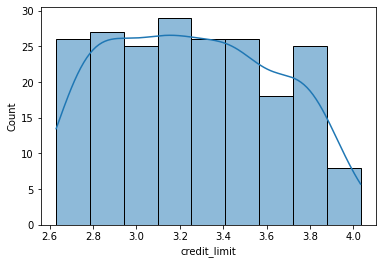

BoxPlot of credit_limit
----------------------------------------------------------------------------


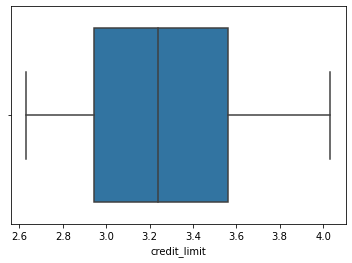

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt
----------------------------------------------------------------------------


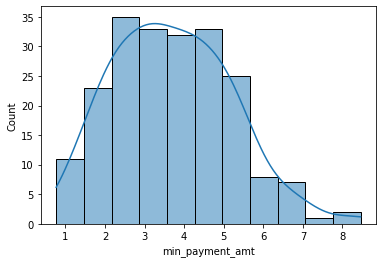

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


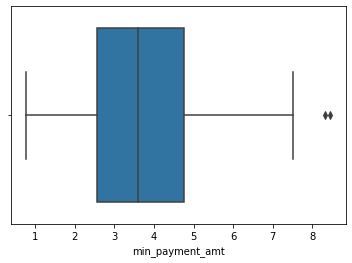

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


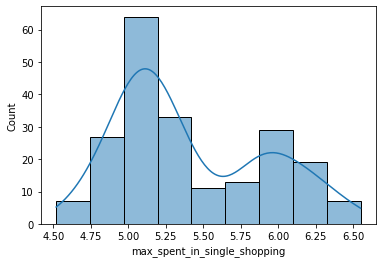

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


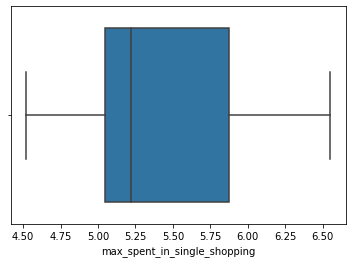

In [14]:
for x in df.columns:
    univaranalysis(x,20)

# Shapiro Test for checking normality of the variables

#H0-the population is normal 
#H1- the population is not normal 

# alpha = 0.05, if p value <alpha,  reject the null hypothesis,
# if p value > alpha,  fail to reject(accept) the null hypothesis

In [15]:
shapiro_test = stats.shapiro(df['spending'])
shapiro_test

ShapiroResult(statistic=0.9325932264328003, pvalue=2.9475659246713803e-08)

# Check skewness of the variables
#skewness = 0 : normally distributed.
#skewness > 0 : right skewed
#skewness < 0 : left skewed 

In [16]:
print( '\nSkewness for spending : ', skew(df['spending']))


Skewness for spending :  0.39702715402072153


In [17]:
shapiro_test = stats.shapiro(df['advance_payments'])
shapiro_test

ShapiroResult(statistic=0.9361613392829895, pvalue=5.901836885868761e-08)

In [18]:
print( '\nSkewness for advance payments : ', skew(df['advance_payments']))


Skewness for advance payments :  0.38380604212562563


In [19]:
shapiro_test = stats.shapiro(df['probability_of_full_payment'])
shapiro_test

ShapiroResult(statistic=0.9730417132377625, pvalue=0.00046959755127318203)

In [20]:
print( '\nSkewness for probability of full payment : ', skew(df['probability_of_full_payment']))


Skewness for probability of full payment :  -0.5341035521949098


In [21]:
shapiro_test = stats.shapiro(df['current_balance'])
shapiro_test

ShapiroResult(statistic=0.943798840045929, pvalue=2.8279683306209336e-07)

In [22]:
print( '\nSkewness for current balance : ', skew(df['current_balance']))


Skewness for current balance :  0.5217206481959235


In [23]:
shapiro_test = stats.shapiro(df['credit_limit'])
shapiro_test

ShapiroResult(statistic=0.960623025894165, pvalue=1.4444454791373573e-05)

In [24]:
print( '\nSkewness for credit limit : ', skew(df['credit_limit']))


Skewness for credit limit :  0.13341648969738135


In [25]:
shapiro_test = stats.shapiro(df['min_payment_amt'])
shapiro_test

ShapiroResult(statistic=0.9836222529411316, pvalue=0.01543912198394537)

In [26]:
print( '\nSkewness for min payment amt : ', skew(df['min_payment_amt']))


Skewness for min payment amt :  0.3987925792256687


In [27]:
shapiro_test = stats.shapiro(df['max_spent_in_single_shopping'])
shapiro_test

ShapiroResult(statistic=0.9249410033226013, pvalue=7.141085056616703e-09)

In [28]:
print( '\nSkewness for max spent in single shopping : ', skew(df['max_spent_in_single_shopping']))


Skewness for max spent in single shopping :  0.5578758322317954


# Multi variate Analysis
Bivariate Analysis

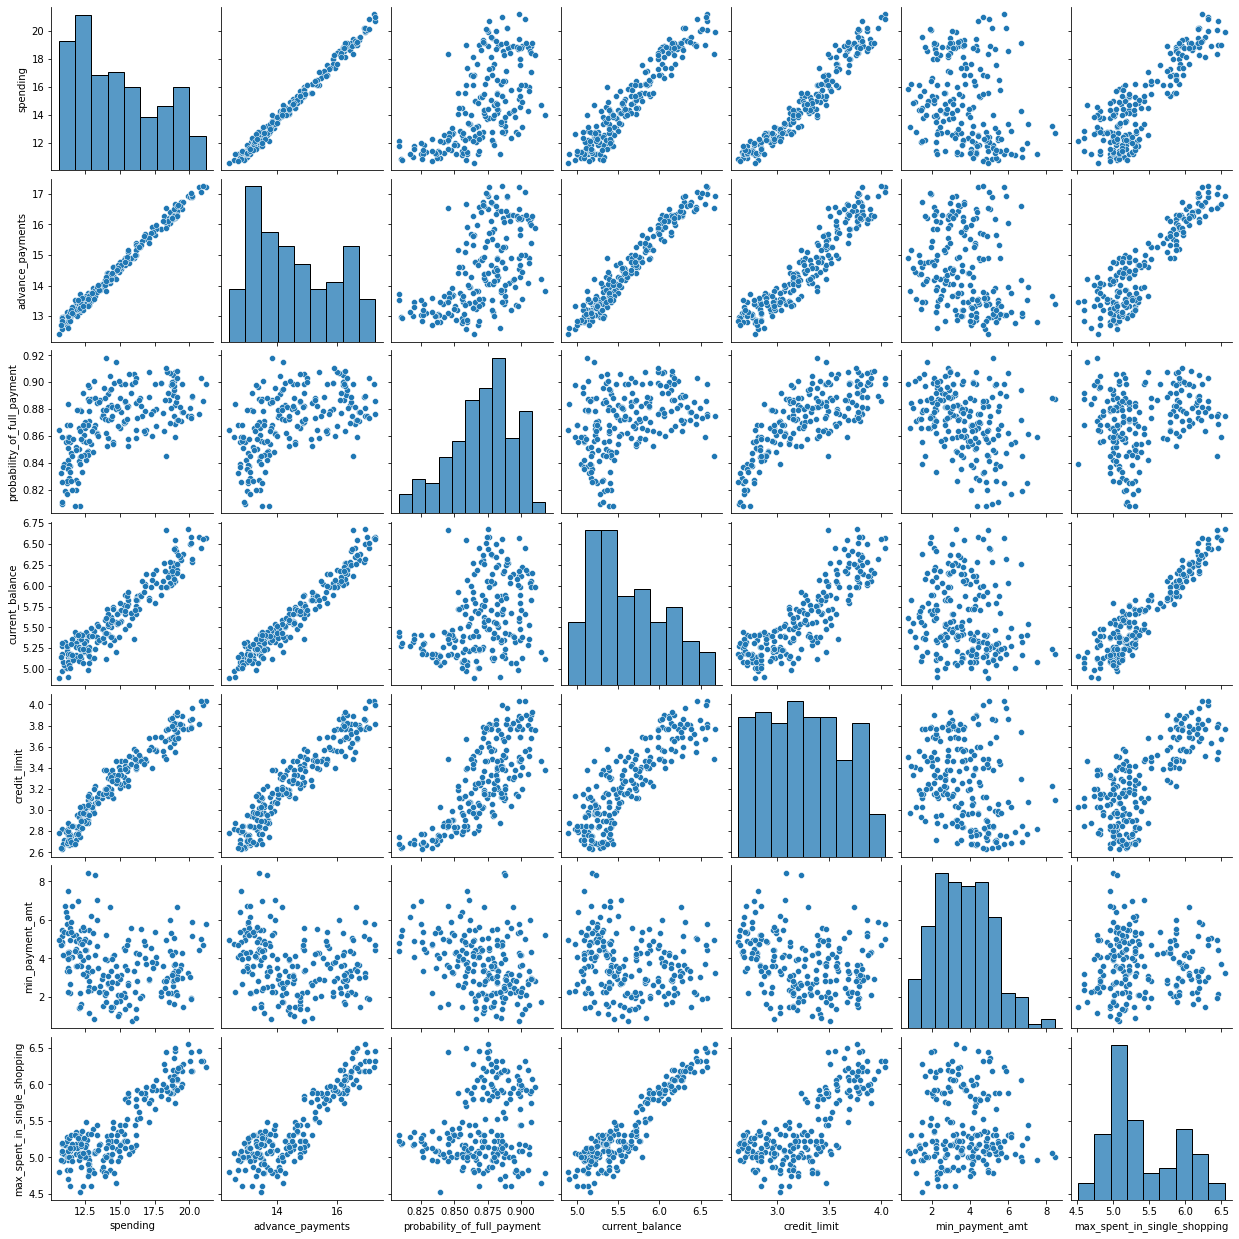

In [29]:
sns.pairplot(df)

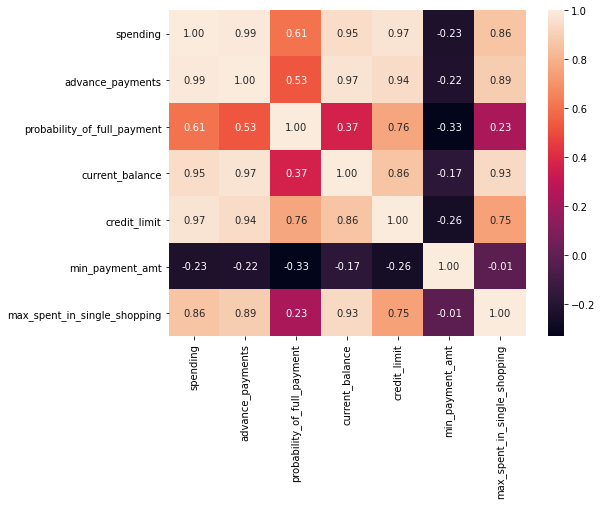

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

<AxesSubplot:xlabel='spending', ylabel='advance_payments'>

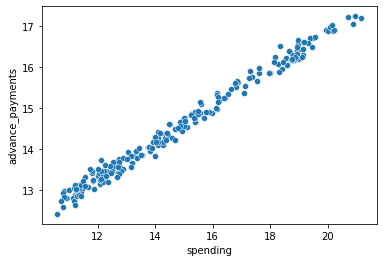

In [31]:
sns.scatterplot(x = 'spending', y= 'advance_payments',data=df)

<AxesSubplot:xlabel='spending', ylabel='current_balance'>

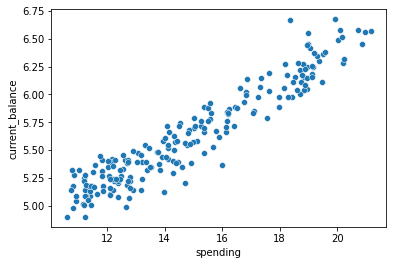

In [32]:
sns.scatterplot(x = 'spending', y= 'current_balance',data=df)

<AxesSubplot:xlabel='spending', ylabel='credit_limit'>

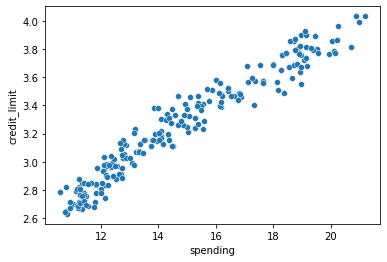

In [33]:
sns.scatterplot(x = 'spending', y= 'credit_limit',data=df)

<AxesSubplot:xlabel='spending', ylabel='max_spent_in_single_shopping'>

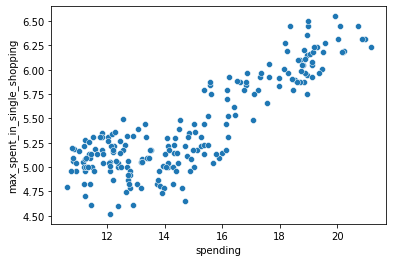

In [34]:
sns.scatterplot(x = 'spending', y= 'max_spent_in_single_shopping',data=df)

<AxesSubplot:xlabel='advance_payments', ylabel='current_balance'>

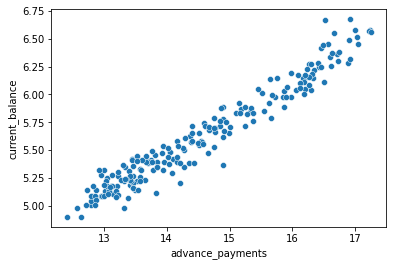

In [35]:
sns.scatterplot(x = 'advance_payments', y= 'current_balance',data=df)

<AxesSubplot:xlabel='advance_payments', ylabel='credit_limit'>

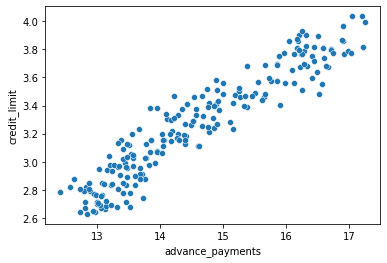

In [36]:
sns.scatterplot(x = 'advance_payments', y= 'credit_limit',data=df)

<AxesSubplot:xlabel='advance_payments', ylabel='max_spent_in_single_shopping'>

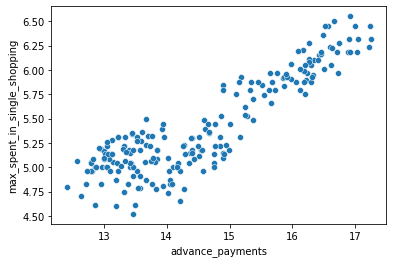

In [37]:
sns.scatterplot(x = 'advance_payments', y= 'max_spent_in_single_shopping',data=df)

<AxesSubplot:xlabel='current_balance', ylabel='credit_limit'>

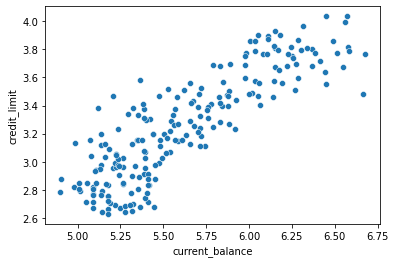

In [38]:
sns.scatterplot(x = 'current_balance', y= 'credit_limit',data=df)

<AxesSubplot:xlabel='current_balance', ylabel='max_spent_in_single_shopping'>

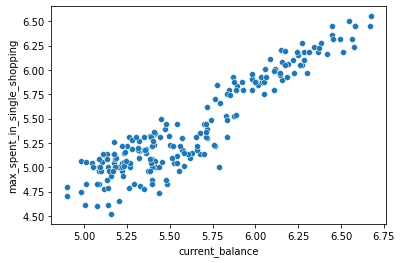

In [39]:
sns.scatterplot(x = 'current_balance', y= 'max_spent_in_single_shopping',data=df)

# 1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

In [40]:
print("standard deviation of  data")
df.std() # standard deviation of the data

standard deviation of  data


spending                        2.909699
advance_payments                1.305959
probability_of_full_payment     0.023629
current_balance                 0.443063
credit_limit                    0.377714
min_payment_amt                 1.503557
max_spent_in_single_shopping    0.491480
dtype: float64

In [41]:
print("Mean of scaled data")
df.mean() #means

Mean of scaled data


spending                        14.847524
advance_payments                14.559286
probability_of_full_payment      0.870999
current_balance                  5.628533
credit_limit                     3.258605
min_payment_amt                  3.700201
max_spent_in_single_shopping     5.408071
dtype: float64

# Scaling using the standard scaler

In [42]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [43]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [44]:
scaled_df = X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [45]:
scaled_df =pd.DataFrame(data = scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [46]:
print("standard deviation of scaled data")
scaled_df.std()

standard deviation of scaled data


0    1.002389
1    1.002389
2    1.002389
3    1.002389
4    1.002389
5    1.002389
6    1.002389
dtype: float64

In [47]:
print("Mean of scaled data")
scaled_df.mean()

Mean of scaled data


0    9.148766e-16
1    1.097006e-16
2    1.260896e-15
3   -1.358702e-16
4   -2.790757e-16
5    5.418946e-16
6   -1.935489e-15
dtype: float64

In [48]:
# scaling & standardising the data
from scipy.stats import zscore
df1=df.apply(zscore)
df1.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
5,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.170590,-0.832274
6,-0.974080,-0.943539,-0.878059,-0.630155,-1.190520,0.380540,-0.204099
7,-0.381541,-0.390903,0.144293,-0.331518,-0.383756,-0.512143,-1.189192
8,1.144591,1.305384,-0.309615,1.453520,0.672468,-0.564811,1.764048
9,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156


In [49]:
print("Mean of scaled data")
df1.mean()

Mean of scaled data


spending                        9.148766e-16
advance_payments                1.097006e-16
probability_of_full_payment     1.260896e-15
current_balance                -1.358702e-16
credit_limit                   -2.790757e-16
min_payment_amt                 5.418946e-16
max_spent_in_single_shopping   -1.935489e-15
dtype: float64

In [50]:
print("standard deviation of scaled data")
df1.std()

standard deviation of scaled data


spending                        1.002389
advance_payments                1.002389
probability_of_full_payment     1.002389
current_balance                 1.002389
credit_limit                    1.002389
min_payment_amt                 1.002389
max_spent_in_single_shopping    1.002389
dtype: float64

# 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

# Creating the Dendrogram
### Importing dendrogram and linkage module

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [52]:
wardlink = linkage(df1, method = 'ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [10.0, 10.0, 46.25, 46.25],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [132.5, 132.5, 170.0, 170.0],
  [91.25, 91.25, 151.25, 151.25],
  [28.125, 28.125, 121.25, 121.25],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [260.0, 260.0, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [275.0, 275.0, 322.5, 322.5],
  [217.5, 217.5, 298.75,

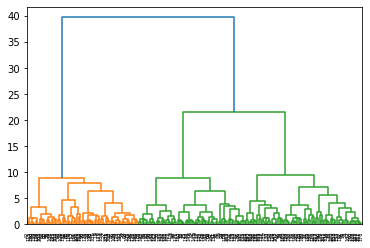

In [53]:
dend = dendrogram(wardlink)
dend

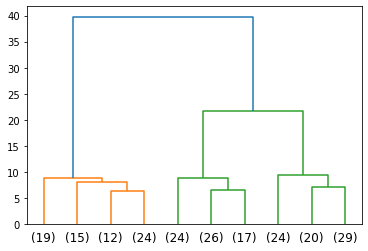

In [54]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [55]:
from scipy.cluster.hierarchy import fcluster

In [56]:
clusters = fcluster(wardlink, 12, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [57]:
df['clusters'] = clusters

In [58]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [59]:
df.to_csv('hc.csv')

# percentage of clusters


In [60]:
df['clusters'].value_counts()

3    73
1    70
2    67
Name: clusters, dtype: int64

In [61]:
df['clusters'].value_counts(normalize = True)

3    0.347619
1    0.333333
2    0.319048
Name: clusters, dtype: float64

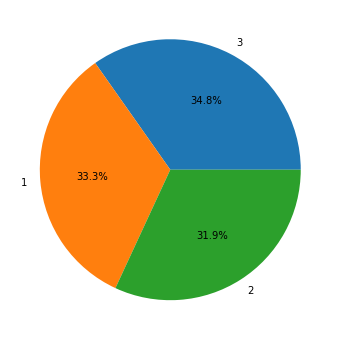

In [62]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(df['clusters'].value_counts(),labels=df['clusters'].value_counts().index,autopct='%1.1f%%')
# autopct="%.1f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode = (0, 0.30, 0, 0,0,0,0) is used here to take the Not Out portion little out(30%) of the pie-chart
plt.show()

<AxesSubplot:xlabel='clusters', ylabel='count'>

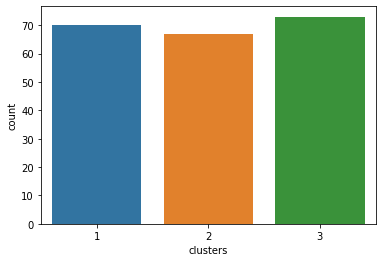

In [63]:
sns.countplot(x='clusters', data = df)

# Visualisation of average value of variables cluster wise

In [64]:
print('Average spending')
df.groupby('clusters')['spending'].mean()

Average spending


clusters
1    18.371429
2    11.872388
3    14.199041
Name: spending, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='spending'>

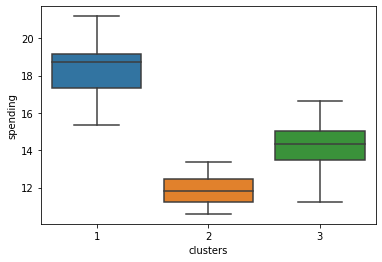

In [65]:
sns.boxplot(x="clusters", y="spending", data=df)

In [66]:
print('Average advance_Payments')
df.groupby('clusters')['advance_payments'].mean()

Average advance_Payments


clusters
1    16.145429
2    13.257015
3    14.233562
Name: advance_payments, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='advance_payments'>

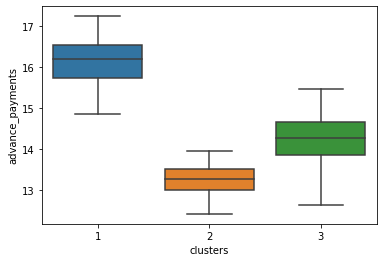

In [67]:
sns.boxplot(x="clusters", y="advance_payments", data=df)

In [68]:
print('Average probability_of_full_payment')
df.groupby('clusters')['probability_of_full_payment'].mean()

Average probability_of_full_payment


clusters
1    0.884400
2    0.848072
3    0.879190
Name: probability_of_full_payment, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='probability_of_full_payment'>

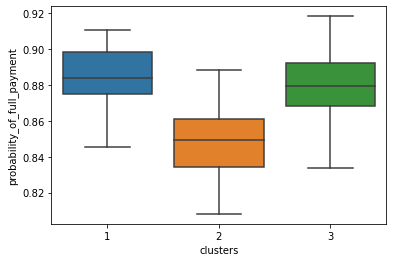

In [69]:
sns.boxplot(x="clusters", y="probability_of_full_payment", data=df)

In [70]:
print('Average current_balance')
df.groupby('clusters')['current_balance'].mean()

Average current_balance


clusters
1    6.158171
2    5.238940
3    5.478233
Name: current_balance, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='current_balance'>

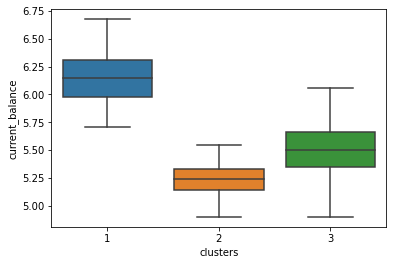

In [71]:
sns.boxplot(x="clusters", y="current_balance", data=df)

In [72]:
print('Average credit_limit')
df.groupby('clusters')['credit_limit'].mean()

Average credit_limit


clusters
1    3.684629
2    2.848537
3    3.226452
Name: credit_limit, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='credit_limit'>

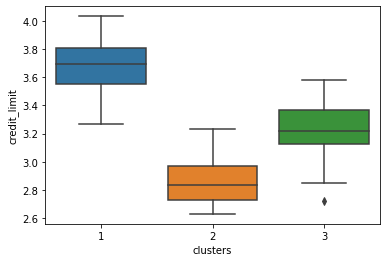

In [73]:
sns.boxplot(x="clusters", y="credit_limit", data=df)

In [74]:
print('Average min_payment_amt')
df.groupby('clusters')['min_payment_amt'].mean()

Average min_payment_amt


clusters
1    3.639157
2    4.949433
3    2.612181
Name: min_payment_amt, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='min_payment_amt'>

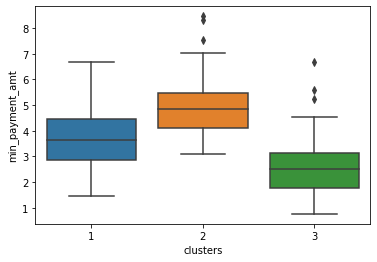

In [75]:
sns.boxplot(x="clusters", y="min_payment_amt", data=df)

In [76]:
print('Average max_spent_in_single_shopping')
df.groupby('clusters')['max_spent_in_single_shopping'].mean()

Average max_spent_in_single_shopping


clusters
1    6.017371
2    5.122209
3    5.086178
Name: max_spent_in_single_shopping, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='max_spent_in_single_shopping'>

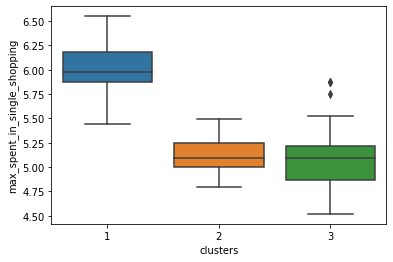

In [77]:
sns.boxplot(x="clusters", y="max_spent_in_single_shopping", data=df)

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

# K Means clustering for 3 clusters

In [78]:
from sklearn.cluster import KMeans 

In [79]:
k_means = KMeans(n_clusters = 3)

In [80]:
k_means.fit(df1)

KMeans(n_clusters=3)

In [81]:
labels = k_means.labels_
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2


In [82]:
df['Clus_kmeans'].value_counts()

0    72
1    71
2    67
Name: Clus_kmeans, dtype: int64

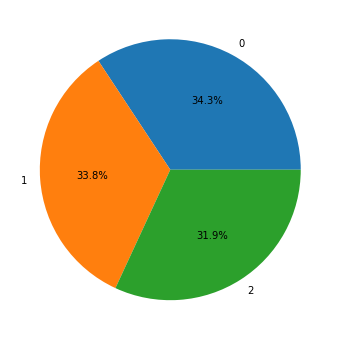

In [83]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(df['Clus_kmeans'].value_counts(),labels=df['Clus_kmeans'].value_counts().index,autopct='%1.1f%%')
# autopct="%.1f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode = (0, 0.30, 0, 0,0,0,0) is used here to take the Not Out portion little out(30%) of the pie-chart
plt.show()

<AxesSubplot:xlabel='Clus_kmeans', ylabel='count'>

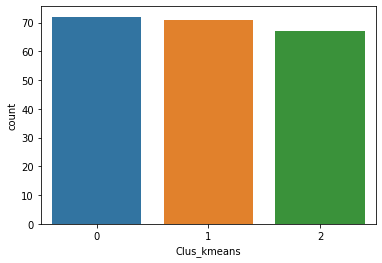

In [84]:
sns.countplot(x='Clus_kmeans', data = df)

In [85]:
df.to_csv('kmeansc.csv')

In [86]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Clus_kmeans'],
      dtype='object')

In [87]:
listcolumns = ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']

# Average of variables after clustering-clusterwise

In [88]:
def findaverage(column,nbins):
    print("Average of " + column)
    print("----------------------------------------------------------------------------")
    print(df.groupby('Clus_kmeans')[column].mean(),end=' ')
    print('')
    print('') 

In [89]:
for x in listcolumns:
    findaverage(x,20)

Average of spending
----------------------------------------------------------------------------
Clus_kmeans
0    11.856944
1    14.437887
2    18.495373
Name: spending, dtype: float64 

Average of advance_payments
----------------------------------------------------------------------------
Clus_kmeans
0    13.247778
1    14.337746
2    16.203433
Name: advance_payments, dtype: float64 

Average of probability_of_full_payment
----------------------------------------------------------------------------
Clus_kmeans
0    0.848253
1    0.881597
2    0.884210
Name: probability_of_full_payment, dtype: float64 

Average of current_balance
----------------------------------------------------------------------------
Clus_kmeans
0    5.231750
1    5.514577
2    6.175687
Name: current_balance, dtype: float64 

Average of credit_limit
----------------------------------------------------------------------------
Clus_kmeans
0    2.849542
1    3.259225
2    3.697537
Name: credit_limit, dtype: float64 

# K-Means clustering with 3 clusters and  within cluster sum of squares.

In [90]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df1)
k_means.inertia_

430.6589731513006

# Within Sum of Squares (WSS) for 2 to 15 clusters.

In [91]:
wss =[]
for i in range(1,16):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)
   

In [92]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.30172127754196,
 326.36760226583755,
 288.95334686682884,
 263.25617158316186,
 243.23993507908165,
 224.33826525564496,
 209.16090414953945,
 198.24986462707452,
 181.38095413946826,
 171.85476731272385,
 165.61591450831028,
 157.6384997140669]

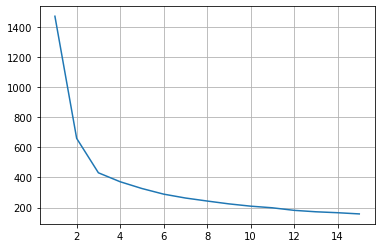

In [93]:
plt.plot(range(1,16), wss)
plt.grid()

# the average silhouette score and silhouette width of the cluster(s) thus created.

In [94]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [95]:
silhouette_score(df1,labels)

0.4007270552751299

In [96]:
sil_width = silhouette_samples(df1,labels)

In [97]:
sil_width

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [98]:
silhouette_samples(df1,labels).min()

0.002713089347678533

# K Means clustering for 2 clusters

In [99]:
k_means2 = KMeans(n_clusters = 2)

In [100]:
k_means2.fit(df1)

KMeans(n_clusters=2)

# K-Means clustering with 2 clusters and  within cluster sum of squares.

In [101]:
k_means2.inertia_

659.171754487041

# the average silhouette score and silhouette width of the cluster(s) thus created.

In [102]:
silhouette_score(df1,k_means2.labels_)
   

0.46577247686580914

# Silhouette width

In [103]:
silhouette_samples(df1,k_means2.labels_).min()

-0.006171238927461077

In [104]:
sil_width = silhouette_samples(df1,k_means2.labels_)
sil_width

array([ 0.6037974 ,  0.00874752,  0.67803785,  0.49530556,  0.54807214,
        0.33977488,  0.58326925,  0.50325626,  0.58819046,  0.61589061,
        0.59569388,  0.34472282,  0.55860337,  0.58387274,  0.53716394,
        0.52744591,  0.10957153,  0.59242953,  0.55381269,  0.54872885,
        0.6160531 ,  0.47727965,  0.58383032,  0.56200063,  0.10101467,
        0.24988767,  0.48168779,  0.46959909,  0.56916779,  0.47686027,
        0.49562697,  0.61586637,  0.59000755,  0.01460085,  0.55546834,
        0.52173   ,  0.5396383 ,  0.55698092,  0.49870522,  0.6612224 ,
        0.63929387,  0.37565261,  0.51693827,  0.6436123 ,  0.49000343,
        0.59935435,  0.42278448,  0.64386191,  0.57615769,  0.63391341,
        0.57596349,  0.55913045,  0.6343461 ,  0.64292999,  0.67361298,
        0.44222908,  0.57219938,  0.57207891,  0.57322059,  0.61709902,
        0.30276434,  0.60285751,  0.60511045,  0.15250828,  0.29538619,
        0.6352326 ,  0.59897964,  0.38188293,  0.67505952,  0.58

# visualisation of average of variables clusterwise

<AxesSubplot:xlabel='Clus_kmeans', ylabel='spending'>

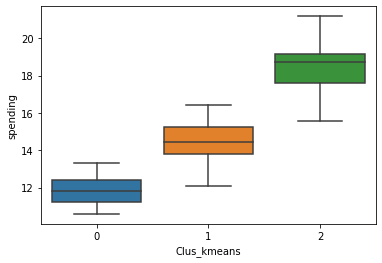

In [105]:
sns.boxplot(x="Clus_kmeans", y="spending", data=df)

<AxesSubplot:xlabel='Clus_kmeans', ylabel='advance_payments'>

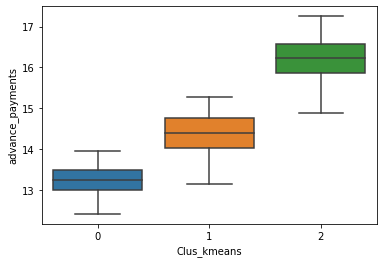

In [106]:
sns.boxplot(x="Clus_kmeans", y="advance_payments", data=df)

In [107]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Clus_kmeans'],
      dtype='object')

<AxesSubplot:xlabel='Clus_kmeans', ylabel='probability_of_full_payment'>

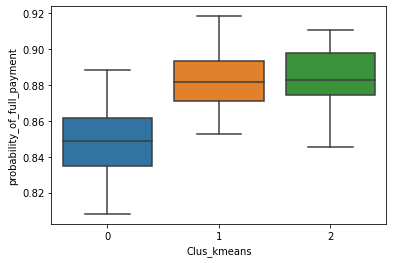

In [108]:
sns.boxplot(x="Clus_kmeans", y="probability_of_full_payment", data=df)

<AxesSubplot:xlabel='Clus_kmeans', ylabel='current_balance'>

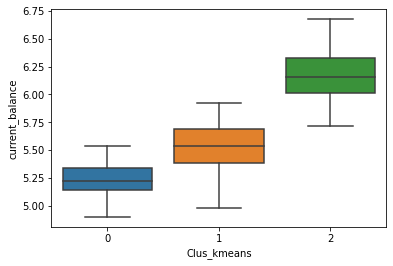

In [109]:
sns.boxplot(x="Clus_kmeans", y="current_balance", data=df)

<AxesSubplot:xlabel='Clus_kmeans', ylabel='credit_limit'>

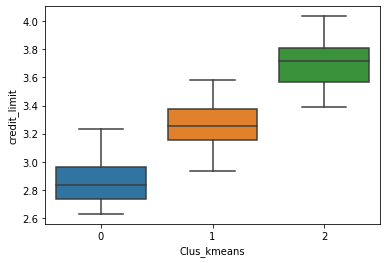

In [110]:
sns.boxplot(x="Clus_kmeans", y="credit_limit", data=df)

<AxesSubplot:xlabel='Clus_kmeans', ylabel='min_payment_amt'>

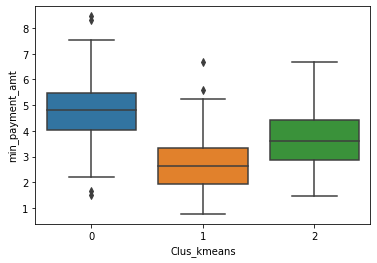

In [111]:
sns.boxplot(x="Clus_kmeans", y="min_payment_amt", data=df)

<AxesSubplot:xlabel='Clus_kmeans', ylabel='max_spent_in_single_shopping'>

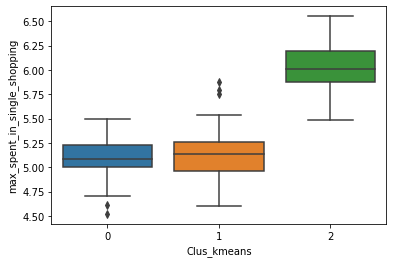

In [112]:
sns.boxplot(x="Clus_kmeans", y="max_spent_in_single_shopping", data=df)

# clustering plot

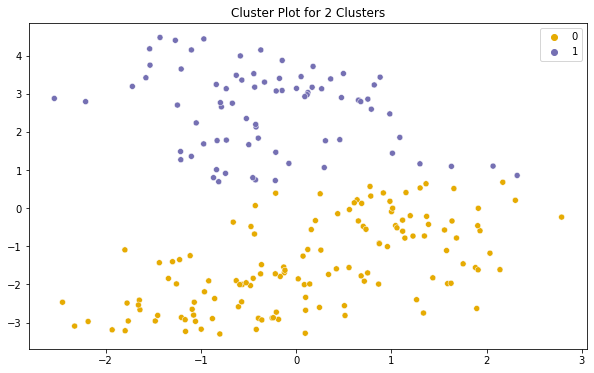

In [113]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df1)
plt.figure(figsize=(10,6))
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=2, random_state=0).fit(df1).labels_, palette='Dark2_r', legend=True)
plt.title('Cluster Plot for 2 Clusters')
plt.show()

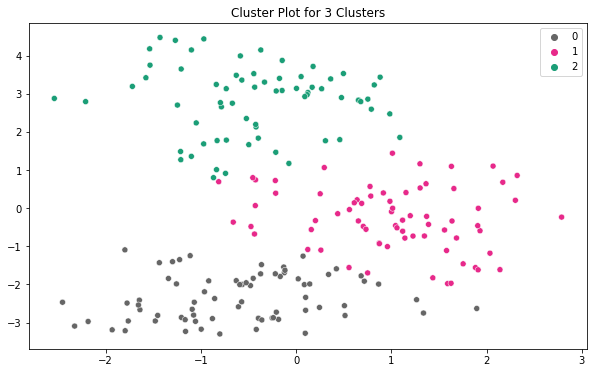

In [114]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df1)
plt.figure(figsize=(10,6))
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=3, random_state=0).fit(df1).labels_, palette='Dark2_r', legend=True)
plt.title('Cluster Plot for 3 Clusters')
plt.show()

# Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
Solution:


# Import data set

In [115]:
df2= pd.read_csv('insurance_part2_data.csv')

# view and describe the data

In [116]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [117]:
df2.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


# Description of the data

In [118]:
df2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


# View the shape of the data

In [119]:
df2.shape

(3000, 10)

# View information

In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# Check for missing values

In [121]:
df2.isnull().sum() 

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

# Check for duplicate records

In [122]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


In [123]:
dup = df2.duplicated()
df2[dup]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


# Check for outliers

<AxesSubplot:xlabel='Age'>

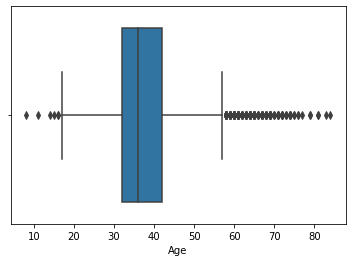

In [124]:
sns.boxplot(x = 'Age', data = df2)

<AxesSubplot:xlabel='Commision'>

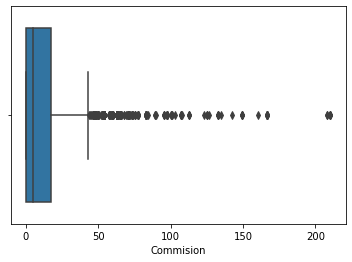

In [125]:
sns.boxplot(x = 'Commision', data = df2)

<AxesSubplot:xlabel='Duration'>

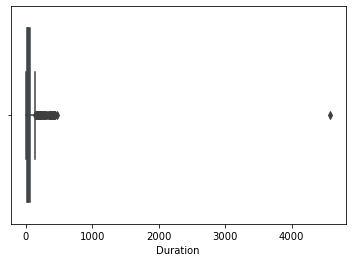

In [126]:
sns.boxplot(x = 'Duration', data = df2)

<AxesSubplot:xlabel='Sales'>

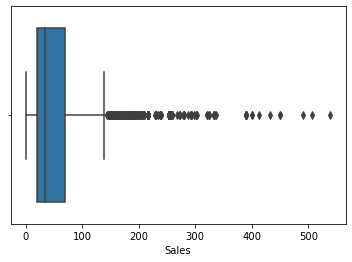

In [127]:
sns.boxplot(x = 'Sales', data = df2)

# Treating anomalies

In [128]:
df2.Duration.unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [129]:
df2.Duration.mode()

0    8
dtype: int64

In [130]:
df2['Duration'] = df2['Duration'].replace(-1, 0)

df2['Duration'].describe()

count    3000.000000
mean       70.001667
std       134.053138
min         0.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

# Data Visualization
# Univariate Analysis


# Numeric Variables

In [131]:
df2.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [132]:
numcol = ['Age','Commision','Duration', 'Sales']
numcol

['Age', 'Commision', 'Duration', 'Sales']

In [133]:
catcol =['Agency_Code', 'Type', 'Claimed','Channel','Product Name', 'Destination']
catcol

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [134]:
def univaranalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    print('')
    print('')
       
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df2[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column])
    plt.show()

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age
----------------------------------------------------------------------------


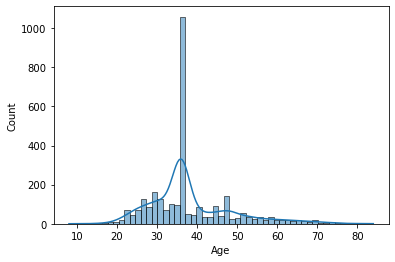

BoxPlot of Age
----------------------------------------------------------------------------


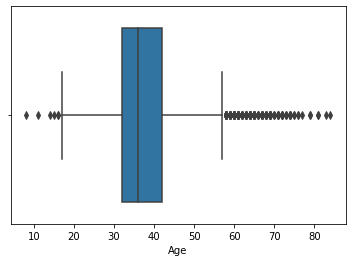

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision
----------------------------------------------------------------------------


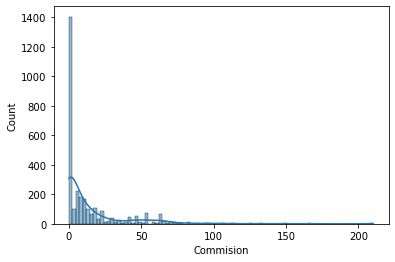

BoxPlot of Commision
----------------------------------------------------------------------------


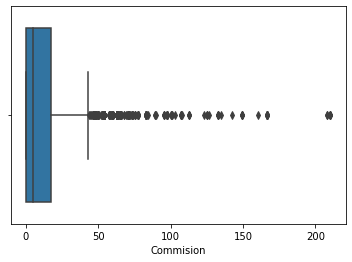

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001667
std       134.053138
min         0.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration
----------------------------------------------------------------------------


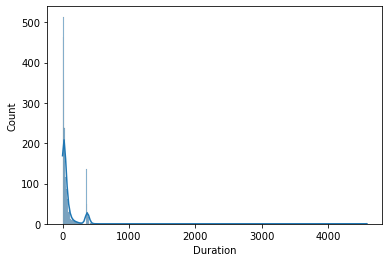

BoxPlot of Duration
----------------------------------------------------------------------------


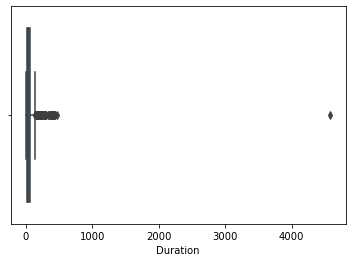

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales
----------------------------------------------------------------------------


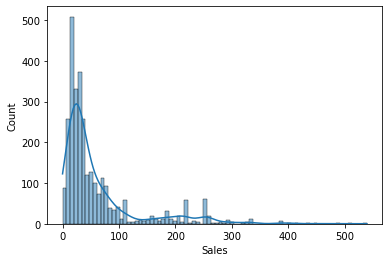

BoxPlot of Sales
----------------------------------------------------------------------------


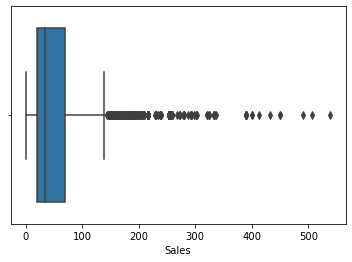

In [135]:
for x in numcol:
    univaranalysis(x,20)

# Categorical Variables

In [136]:
def univarcatcol(column,nbins):
    print("Percentage Value counts of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].value_counts(normalize = True),end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Frequency Distribution of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.countplot(y=df2[column])
    plt.show()

Percentage Value counts of Agency_Code
----------------------------------------------------------------------------
EPX    0.455000
C2B    0.308000
CWT    0.157333
JZI    0.079667
Name: Agency_Code, dtype: float64 

Frequency Distribution of Agency_Code
----------------------------------------------------------------------------


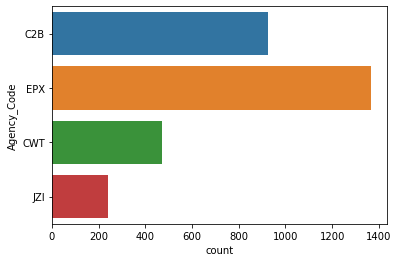

Percentage Value counts of Type
----------------------------------------------------------------------------
Travel Agency    0.612333
Airlines         0.387667
Name: Type, dtype: float64 

Frequency Distribution of Type
----------------------------------------------------------------------------


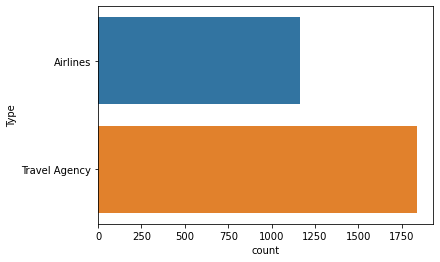

Percentage Value counts of Claimed
----------------------------------------------------------------------------
No     0.692
Yes    0.308
Name: Claimed, dtype: float64 

Frequency Distribution of Claimed
----------------------------------------------------------------------------


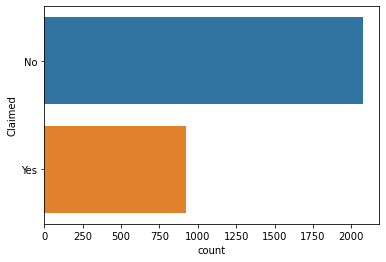

Percentage Value counts of Channel
----------------------------------------------------------------------------
Online     0.984667
Offline    0.015333
Name: Channel, dtype: float64 

Frequency Distribution of Channel
----------------------------------------------------------------------------


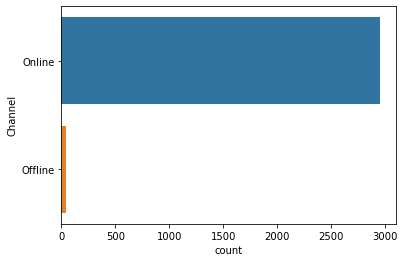

Percentage Value counts of Product Name
----------------------------------------------------------------------------
Customised Plan      0.378667
Cancellation Plan    0.226000
Bronze Plan          0.216667
Silver Plan          0.142333
Gold Plan            0.036333
Name: Product Name, dtype: float64 

Frequency Distribution of Product Name
----------------------------------------------------------------------------


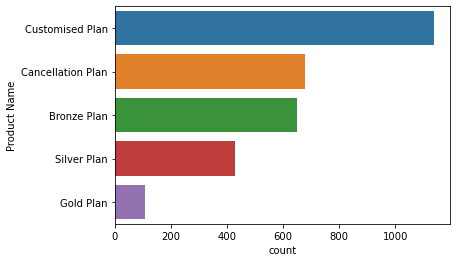

Percentage Value counts of Destination
----------------------------------------------------------------------------
ASIA        0.821667
Americas    0.106667
EUROPE      0.071667
Name: Destination, dtype: float64 

Frequency Distribution of Destination
----------------------------------------------------------------------------


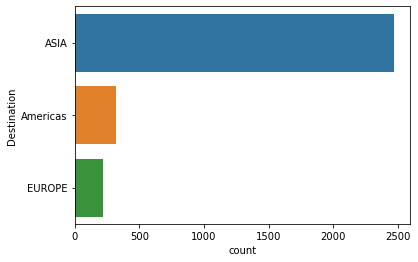

In [137]:
for x in catcol:
    univarcatcol(x,20)

# Bivariate Analysis

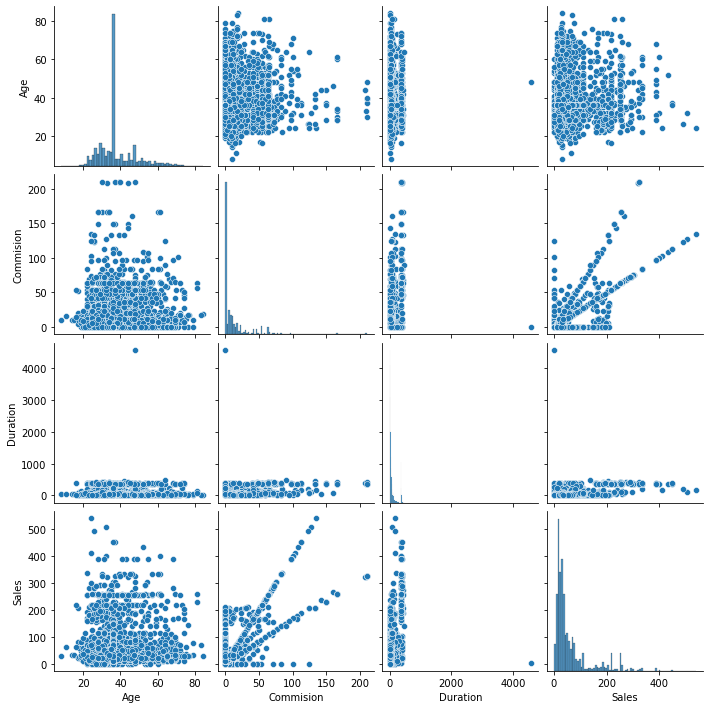

In [138]:
sns.pairplot(df2)

# HeatMap -Correlation

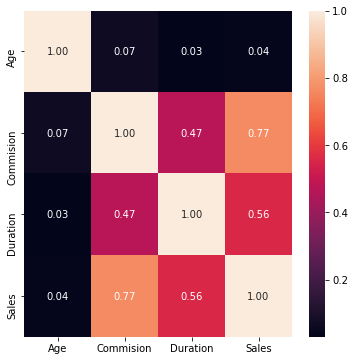

In [139]:
plt.figure(figsize=(6,6))
sns.heatmap(df2.corr(),annot=True,fmt=".2f");

<AxesSubplot:xlabel='Sales', ylabel='Commision'>

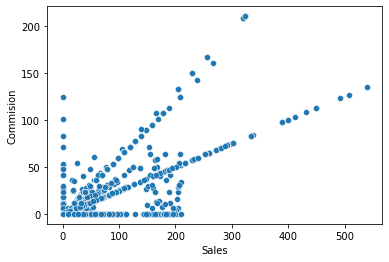

In [140]:
sns.scatterplot(x = 'Sales', y= 'Commision',data=df2)

# Categorical vs categorical

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

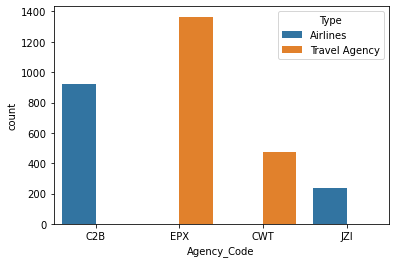

In [141]:
sns.countplot(x='Agency_Code', hue='Type', data=df2)

In [142]:
pd.crosstab(df2['Agency_Code'], df2['Type'], margins=True)

Type,Airlines,Travel Agency,All
Agency_Code,,,
C2B,924,0,924
CWT,0,472,472
EPX,0,1365,1365
JZI,239,0,239
All,1163,1837,3000


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

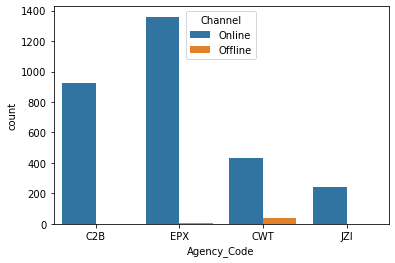

In [143]:
sns.countplot(x='Agency_Code', hue='Channel', data=df2)

In [144]:
pd.crosstab(df2['Agency_Code'], df2['Channel'], margins=True)

Channel,Offline,Online,All
Agency_Code,,,
C2B,0,924,924
CWT,40,432,472
EPX,6,1359,1365
JZI,0,239,239
All,46,2954,3000


In [145]:
pd.crosstab(df2['Agency_Code'], df2['Channel'], margins=True, normalize = True)

Channel,Offline,Online,All
Agency_Code,,,
C2B,0.000000,0.308000,0.308000
CWT,0.013333,0.144000,0.157333
EPX,0.002000,0.453000,0.455000
JZI,0.000000,0.079667,0.079667
All,0.015333,0.984667,1.000000


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

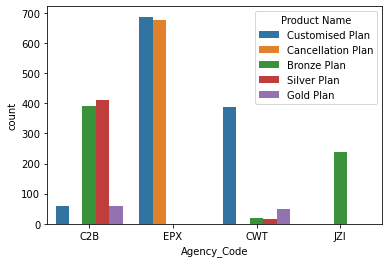

In [146]:
sns.countplot(x='Agency_Code', hue='Product Name', data=df2)

In [147]:
pd.crosstab(df2['Agency_Code'], df2['Product Name'], margins=True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Agency_Code,,,,,,
C2B,392,0,60,60,412,924
CWT,19,0,389,49,15,472
EPX,0,678,687,0,0,1365
JZI,239,0,0,0,0,239
All,650,678,1136,109,427,3000


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

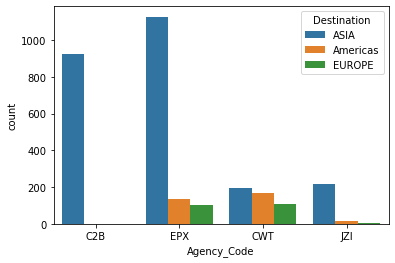

In [148]:
sns.countplot(x='Agency_Code', hue='Destination', data=df2)

In [149]:
pd.crosstab(df2['Agency_Code'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Agency_Code,,,,
C2B,924,0,0,924
CWT,194,170,108,472
EPX,1128,134,103,1365
JZI,219,16,4,239
All,2465,320,215,3000


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

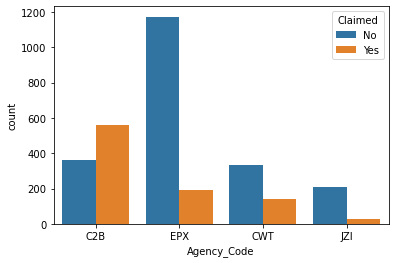

In [150]:
sns.countplot(x='Agency_Code', hue='Claimed', data=df2)

In [151]:
pd.crosstab(df2['Agency_Code'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Agency_Code,,,
C2B,364,560,924
CWT,331,141,472
EPX,1172,193,1365
JZI,209,30,239
All,2076,924,3000


In [152]:
pd.crosstab(df2['Agency_Code'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Agency_Code,,,
C2B,0.121333,0.186667,0.308000
CWT,0.110333,0.047000,0.157333
EPX,0.390667,0.064333,0.455000
JZI,0.069667,0.010000,0.079667
All,0.692000,0.308000,1.000000


In [153]:
catcol

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

<AxesSubplot:xlabel='Type', ylabel='count'>

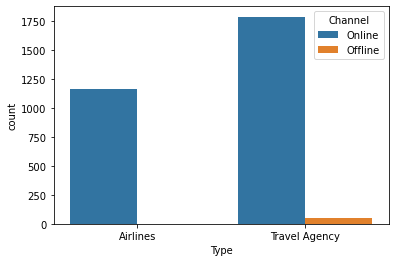

In [154]:

sns.countplot(x='Type', hue='Channel', data=df2)

In [155]:
pd.crosstab(df2['Type'], df2['Channel'], margins=True)

Channel,Offline,Online,All
Type,,,
Airlines,0,1163,1163
Travel Agency,46,1791,1837
All,46,2954,3000


In [156]:
pd.crosstab(df2['Type'], df2['Channel'], margins=True, normalize = True)

Channel,Offline,Online,All
Type,,,
Airlines,0.000000,0.387667,0.387667
Travel Agency,0.015333,0.597000,0.612333
All,0.015333,0.984667,1.000000


<AxesSubplot:xlabel='Type', ylabel='count'>

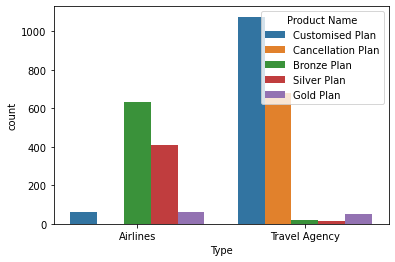

In [157]:
sns.countplot(x='Type', hue='Product Name', data=df2)

In [158]:
pd.crosstab(df2['Type'], df2['Product Name'], margins=True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Type,,,,,,
Airlines,631,0,60,60,412,1163
Travel Agency,19,678,1076,49,15,1837
All,650,678,1136,109,427,3000


In [159]:
pd.crosstab(df2['Type'], df2['Product Name'], margins=True, normalize = True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Type,,,,,,
Airlines,0.210333,0.000,0.020000,0.020000,0.137333,0.387667
Travel Agency,0.006333,0.226,0.358667,0.016333,0.005000,0.612333
All,0.216667,0.226,0.378667,0.036333,0.142333,1.000000


<AxesSubplot:xlabel='Type', ylabel='count'>

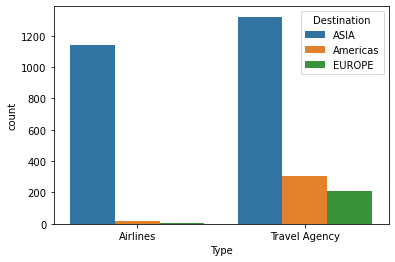

In [160]:
sns.countplot(x='Type', hue='Destination', data=df2)

In [161]:
pd.crosstab(df2['Type'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Type,,,,
Airlines,1143,16,4,1163
Travel Agency,1322,304,211,1837
All,2465,320,215,3000


In [162]:
pd.crosstab(df2['Type'], df2['Destination'], margins=True, normalize = True)

Destination,ASIA,Americas,EUROPE,All
Type,,,,
Airlines,0.381000,0.005333,0.001333,0.387667
Travel Agency,0.440667,0.101333,0.070333,0.612333
All,0.821667,0.106667,0.071667,1.000000


<AxesSubplot:xlabel='Type', ylabel='count'>

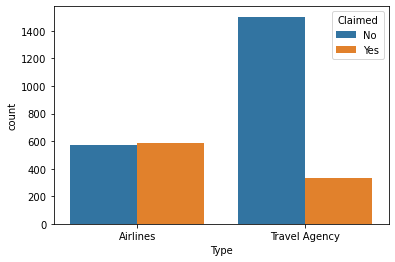

In [163]:
sns.countplot(x='Type', hue='Claimed', data=df2)

In [164]:
pd.crosstab(df2['Type'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Type,,,
Airlines,573,590,1163
Travel Agency,1503,334,1837
All,2076,924,3000


In [165]:
pd.crosstab(df2['Type'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Type,,,
Airlines,0.191,0.196667,0.387667
Travel Agency,0.501,0.111333,0.612333
All,0.692,0.308000,1.000000


<AxesSubplot:xlabel='Channel', ylabel='count'>

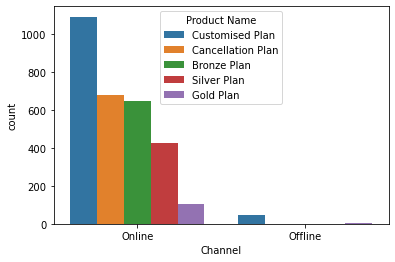

In [166]:
sns.countplot(x='Channel', hue='Product Name', data=df2)

In [167]:
pd.crosstab(df2['Channel'], df2['Product Name'], margins=True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Channel,,,,,,
Offline,0,0,44,2,0,46
Online,650,678,1092,107,427,2954
All,650,678,1136,109,427,3000


In [168]:
pd.crosstab(df2['Channel'], df2['Product Name'], margins=True, normalize = True)

Product Name,Bronze Plan,Cancellation Plan,Customised Plan,Gold Plan,Silver Plan,All
Channel,,,,,,
Offline,0.000000,0.000,0.014667,0.000667,0.000000,0.015333
Online,0.216667,0.226,0.364000,0.035667,0.142333,0.984667
All,0.216667,0.226,0.378667,0.036333,0.142333,1.000000


<AxesSubplot:xlabel='Channel', ylabel='count'>

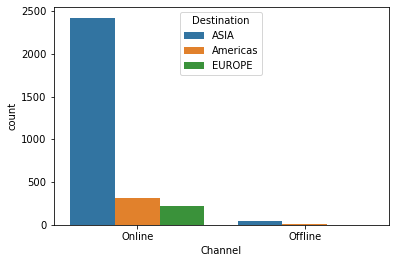

In [169]:
sns.countplot(x='Channel', hue='Destination', data=df2)

In [170]:
pd.crosstab(df2['Channel'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Channel,,,,
Offline,42,4,0,46
Online,2423,316,215,2954
All,2465,320,215,3000


In [171]:
pd.crosstab(df2['Channel'], df2['Destination'], margins=True, normalize = True)

Destination,ASIA,Americas,EUROPE,All
Channel,,,,
Offline,0.014000,0.001333,0.000000,0.015333
Online,0.807667,0.105333,0.071667,0.984667
All,0.821667,0.106667,0.071667,1.000000


<AxesSubplot:xlabel='Channel', ylabel='count'>

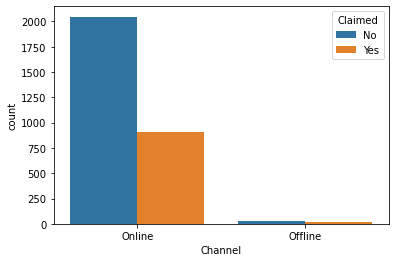

In [172]:
sns.countplot(x='Channel', hue='Claimed', data=df2)

In [173]:
pd.crosstab(df2['Channel'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Channel,,,
Offline,29,17,46
Online,2047,907,2954
All,2076,924,3000


In [174]:
pd.crosstab(df2['Channel'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Channel,,,
Offline,0.009667,0.005667,0.015333
Online,0.682333,0.302333,0.984667
All,0.692000,0.308000,1.000000


<AxesSubplot:xlabel='count', ylabel='Product Name'>

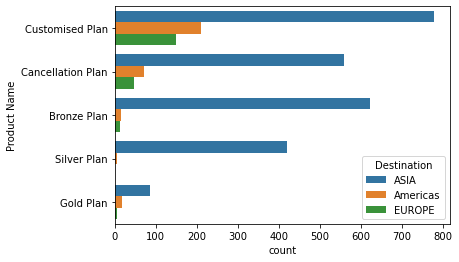

In [175]:
sns.countplot(y='Product Name', hue='Destination', data=df2)

In [176]:

pd.crosstab(df2['Product Name'], df2['Destination'], margins=True)

Destination,ASIA,Americas,EUROPE,All
Product Name,,,,
Bronze Plan,622,16,12,650
Cancellation Plan,558,72,48,678
Customised Plan,777,210,149,1136
Gold Plan,87,17,5,109
Silver Plan,421,5,1,427
All,2465,320,215,3000


In [177]:
pd.crosstab(df2['Product Name'], df2['Destination'], margins=True, normalize = True)

Destination,ASIA,Americas,EUROPE,All
Product Name,,,,
Bronze Plan,0.207333,0.005333,0.004000,0.216667
Cancellation Plan,0.186000,0.024000,0.016000,0.226000
Customised Plan,0.259000,0.070000,0.049667,0.378667
Gold Plan,0.029000,0.005667,0.001667,0.036333
Silver Plan,0.140333,0.001667,0.000333,0.142333
All,0.821667,0.106667,0.071667,1.000000


<AxesSubplot:xlabel='count', ylabel='Product Name'>

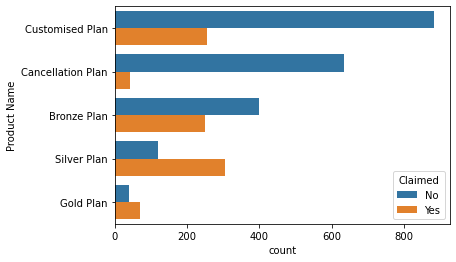

In [178]:
sns.countplot(y='Product Name', hue='Claimed', data=df2)

In [179]:
pd.crosstab(df2['Product Name'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Product Name,,,
Bronze Plan,399,251,650
Cancellation Plan,635,43,678
Customised Plan,882,254,1136
Gold Plan,39,70,109
Silver Plan,121,306,427
All,2076,924,3000


In [180]:
pd.crosstab(df2['Product Name'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Product Name,,,
Bronze Plan,0.133000,0.083667,0.216667
Cancellation Plan,0.211667,0.014333,0.226000
Customised Plan,0.294000,0.084667,0.378667
Gold Plan,0.013000,0.023333,0.036333
Silver Plan,0.040333,0.102000,0.142333
All,0.692000,0.308000,1.000000


<AxesSubplot:xlabel='Destination', ylabel='count'>

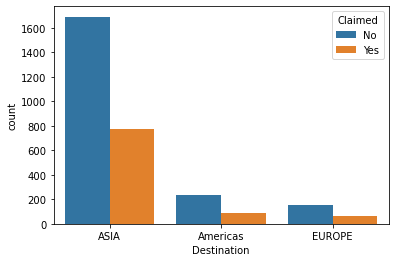

In [181]:
sns.countplot(x='Destination', hue='Claimed', data=df2)

In [182]:
pd.crosstab(df2['Destination'], df2['Claimed'], margins=True)

Claimed,No,Yes,All
Destination,,,
ASIA,1691,774,2465
Americas,232,88,320
EUROPE,153,62,215
All,2076,924,3000


In [183]:
pd.crosstab(df2['Destination'], df2['Claimed'], margins=True, normalize = True)

Claimed,No,Yes,All
Destination,,,
ASIA,0.563667,0.258000,0.821667
Americas,0.077333,0.029333,0.106667
EUROPE,0.051000,0.020667,0.071667
All,0.692000,0.308000,1.000000


# Categorical vs Numeric

In [184]:
catcol

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [185]:
def bivarnumcat(column,nbins):
    print("Mean of Age for " + column)
    print(df2.groupby(df2[column])['Age'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Age vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Age', data=df2)
    plt.show()

Mean of Age for Agency_Code
Agency_Code
C2B    37.765152
CWT    40.141949
EPX    36.832967
JZI    42.485356
Name: Age, dtype: float64 

Plot of Age vs Agency_Code
----------------------------------------------------------------------------


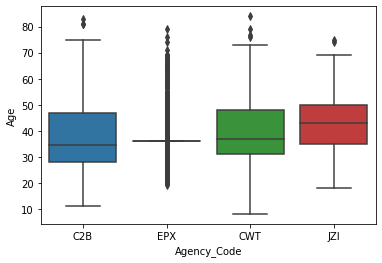

Mean of Age for Type
Type
Airlines         38.735168
Travel Agency    37.683179
Name: Age, dtype: float64 

Plot of Age vs Type
----------------------------------------------------------------------------


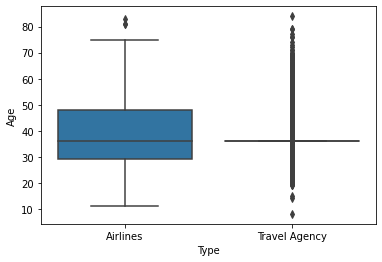

Mean of Age for Claimed
Claimed
No     38.300578
Yes    37.620130
Name: Age, dtype: float64 

Plot of Age vs Claimed
----------------------------------------------------------------------------


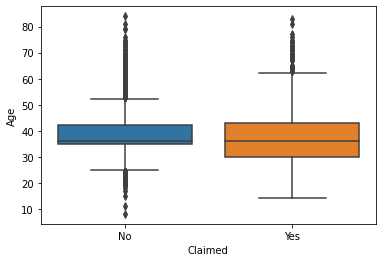

Mean of Age for Channel
Channel
Offline    43.869565
Online     38.001016
Name: Age, dtype: float64 

Plot of Age vs Channel
----------------------------------------------------------------------------


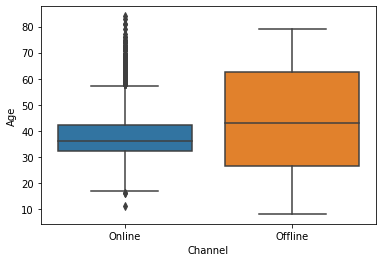

Mean of Age for Product Name
Product Name
Bronze Plan          38.412308
Cancellation Plan    36.497050
Customised Plan      38.608275
Gold Plan            41.908257
Silver Plan          37.782201
Name: Age, dtype: float64 

Plot of Age vs Product Name
----------------------------------------------------------------------------


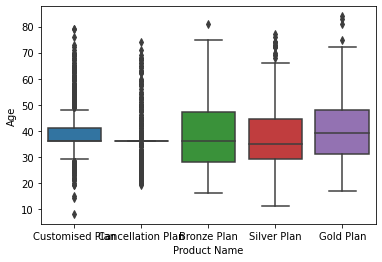

Mean of Age for Destination
Destination
ASIA        38.048276
Americas    38.481250
EUROPE      38.000000
Name: Age, dtype: float64 

Plot of Age vs Destination
----------------------------------------------------------------------------


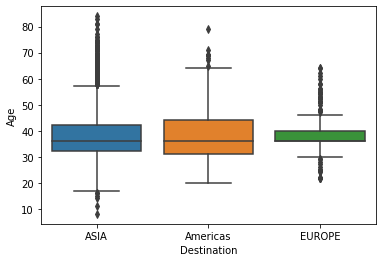

In [186]:
for x in catcol:
    bivarnumcat(x,20)

In [187]:
def bivarnumcat(column,nbins):
    print("Mean of Duration for " + column)
    print(df2.groupby(df2[column])['Duration'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Duration vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Duration', data=df2)
    plt.show()

Mean of Duration for Agency_Code
Agency_Code
C2B    119.404762
CWT     64.733051
EPX     43.374359
JZI     41.485356
Name: Duration, dtype: float64 

Plot of Duration vs Agency_Code
----------------------------------------------------------------------------


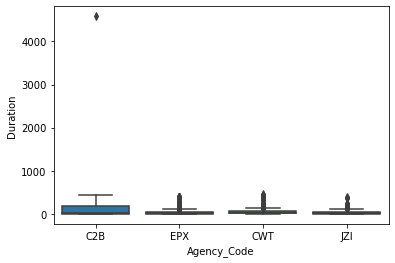

Mean of Duration for Type
Type
Airlines         103.392089
Travel Agency     48.862275
Name: Duration, dtype: float64 

Plot of Duration vs Type
----------------------------------------------------------------------------


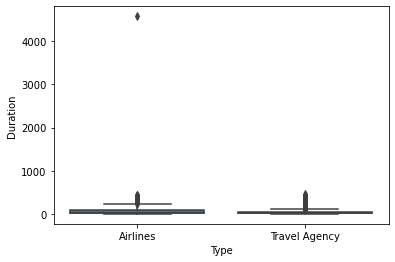

Mean of Duration for Claimed
Claimed
No      50.783719
Yes    113.179654
Name: Duration, dtype: float64 

Plot of Duration vs Claimed
----------------------------------------------------------------------------


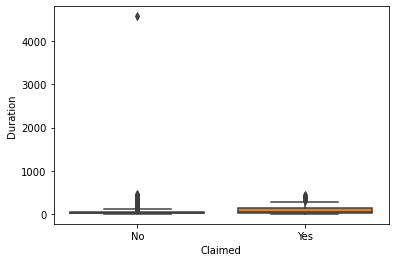

Mean of Duration for Channel
Channel
Offline    90.826087
Online     69.677387
Name: Duration, dtype: float64 

Plot of Duration vs Channel
----------------------------------------------------------------------------


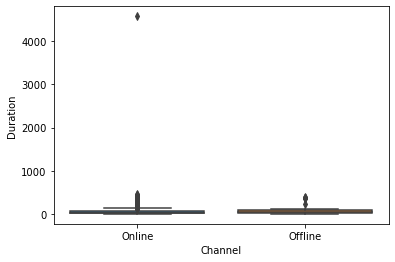

Mean of Duration for Product Name
Product Name
Bronze Plan           35.078462
Cancellation Plan     41.026549
Customised Plan       51.676937
Gold Plan            178.688073
Silver Plan          190.177986
Name: Duration, dtype: float64 

Plot of Duration vs Product Name
----------------------------------------------------------------------------


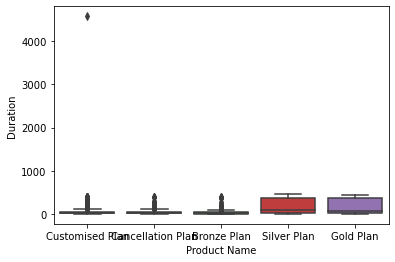

Mean of Duration for Destination
Destination
ASIA        70.443408
Americas    77.409375
EUROPE      53.911628
Name: Duration, dtype: float64 

Plot of Duration vs Destination
----------------------------------------------------------------------------


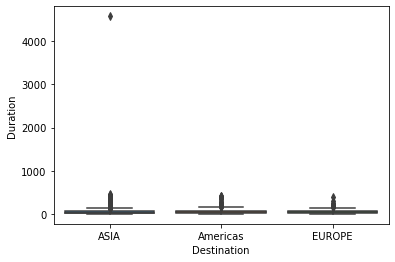

In [188]:
for x in catcol:
    bivarnumcat(x,20)

In [189]:
def bivarnumcat(column,nbins):
    print("Mean of Sales for " + column)
    print(df2.groupby(df2[column])['Sales'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Sales vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Sales', data=df2)
    plt.show()

Mean of Sales for Agency_Code
Agency_Code
C2B    94.984632
CWT    66.834852
EPX    38.671810
JZI    36.196109
Name: Sales, dtype: float64 

Plot of Sales vs Agency_Code
----------------------------------------------------------------------------


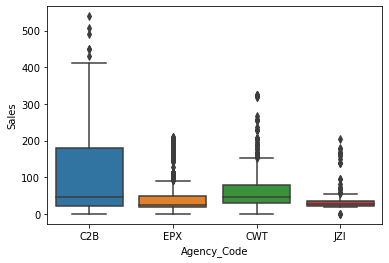

Mean of Sales for Type
Type
Airlines         82.903414
Travel Agency    45.908040
Name: Sales, dtype: float64 

Plot of Sales vs Type
----------------------------------------------------------------------------


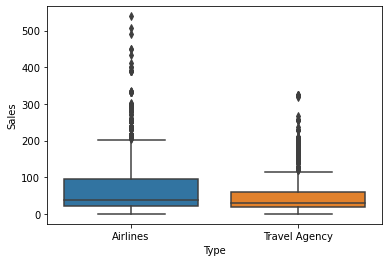

Mean of Sales for Claimed
Claimed
No     43.789133
Yes    97.233225
Name: Sales, dtype: float64 

Plot of Sales vs Claimed
----------------------------------------------------------------------------


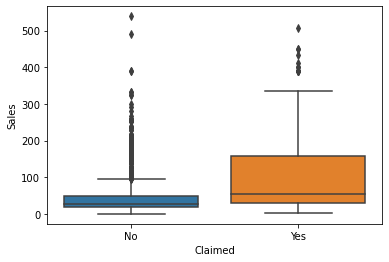

Mean of Sales for Channel
Channel
Offline    39.043478
Online     60.580142
Name: Sales, dtype: float64 

Plot of Sales vs Channel
----------------------------------------------------------------------------


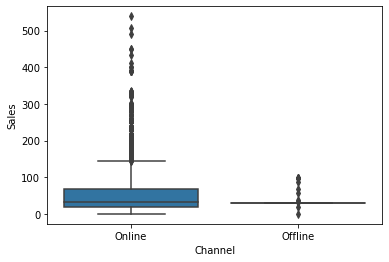

Mean of Sales for Product Name
Product Name
Bronze Plan           39.446754
Cancellation Plan     31.965988
Customised Plan       47.863697
Gold Plan            179.743578
Silver Plan          139.276815
Name: Sales, dtype: float64 

Plot of Sales vs Product Name
----------------------------------------------------------------------------


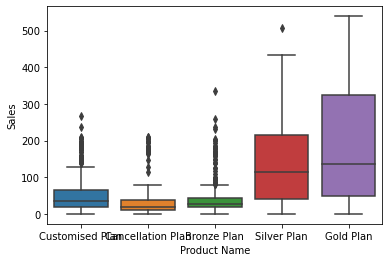

Mean of Sales for Destination
Destination
ASIA        56.467513
Americas    82.573281
EUROPE      70.390093
Name: Sales, dtype: float64 

Plot of Sales vs Destination
----------------------------------------------------------------------------


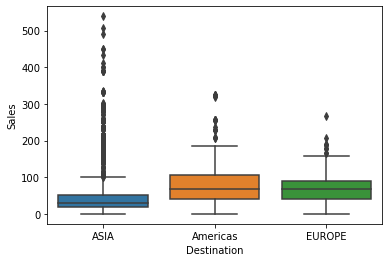

In [190]:
for x in catcol:
    bivarnumcat(x,20)

In [191]:
def bivarnumcat(column,nbins):
    print("Mean of Commission for " + column)
    print(df2.groupby(df2[column])['Commision'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of Commission vs " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x= df2[column], y='Commision', data=df2)
    plt.show()

Mean of Commission for Agency_Code
Agency_Code
C2B    24.006169
CWT    39.144619
EPX     0.108425
JZI    11.638703
Name: Commision, dtype: float64 

Plot of Commission vs Agency_Code
----------------------------------------------------------------------------


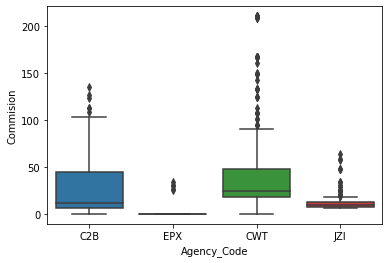

Mean of Commission for Type
Type
Airlines         21.464617
Travel Agency    10.138410
Name: Commision, dtype: float64 

Plot of Commission vs Type
----------------------------------------------------------------------------


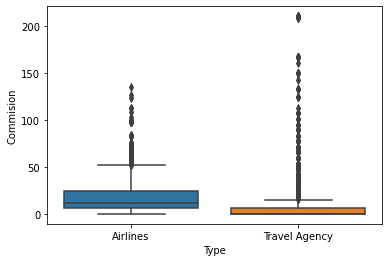

Mean of Commission for Claimed
Claimed
No      9.472606
Yes    25.890130
Name: Commision, dtype: float64 

Plot of Commission vs Claimed
----------------------------------------------------------------------------


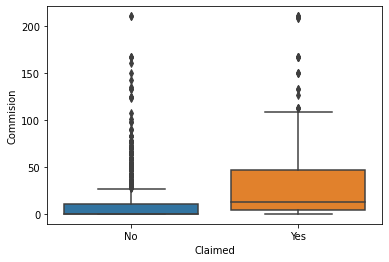

Mean of Commission for Channel
Channel
Offline     7.676957
Online     14.635907
Name: Commision, dtype: float64 

Plot of Commission vs Channel
----------------------------------------------------------------------------


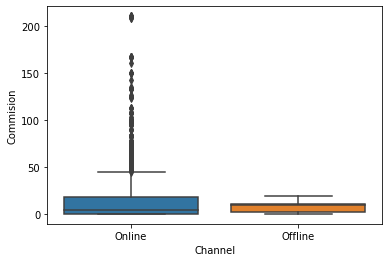

Mean of Commission for Product Name
Product Name
Bronze Plan          11.322938
Cancellation Plan     0.132743
Customised Plan      11.654463
Gold Plan            67.195596
Silver Plan          36.472857
Name: Commision, dtype: float64 

Plot of Commission vs Product Name
----------------------------------------------------------------------------


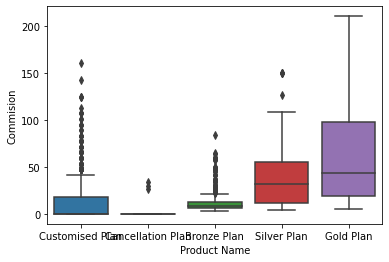

Mean of Commission for Destination
Destination
ASIA        11.732207
Americas    32.339906
EUROPE      20.088140
Name: Commision, dtype: float64 

Plot of Commission vs Destination
----------------------------------------------------------------------------


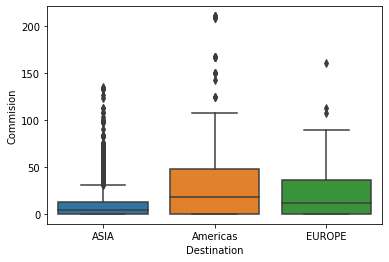

In [192]:
for x in catcol:
    bivarnumcat(x,20)

Plot of Age vs Product
----------------------------------------------------------------------------


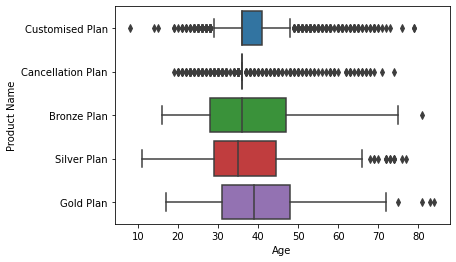

In [193]:
plt.figure()
print("Plot of Age vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Age', y='Product Name', data=df2)
plt.show()

Plot of Duration vs Product
----------------------------------------------------------------------------


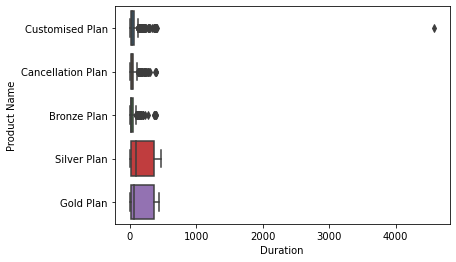

In [194]:
plt.figure()
print("Plot of Duration vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Duration', y='Product Name', data=df2)
plt.show()

Plot of Sales vs Product
----------------------------------------------------------------------------


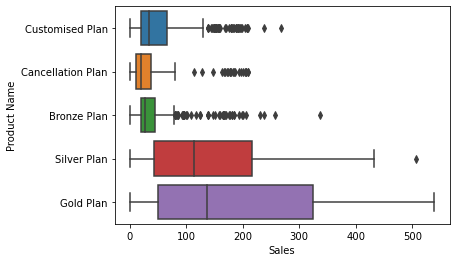

In [195]:
plt.figure()
print("Plot of Sales vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Sales', y='Product Name', data=df2)
plt.show()

Plot of Commission vs Product
----------------------------------------------------------------------------


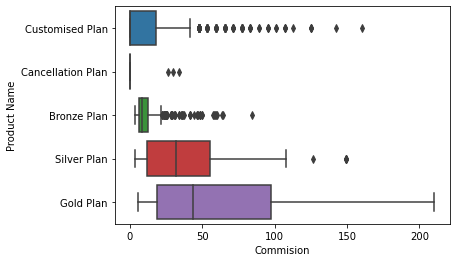

In [196]:
plt.figure()
print("Plot of Commission vs Product")
print("----------------------------------------------------------------------------")
sns.boxplot(x= 'Commision', y='Product Name', data=df2)
plt.show()

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

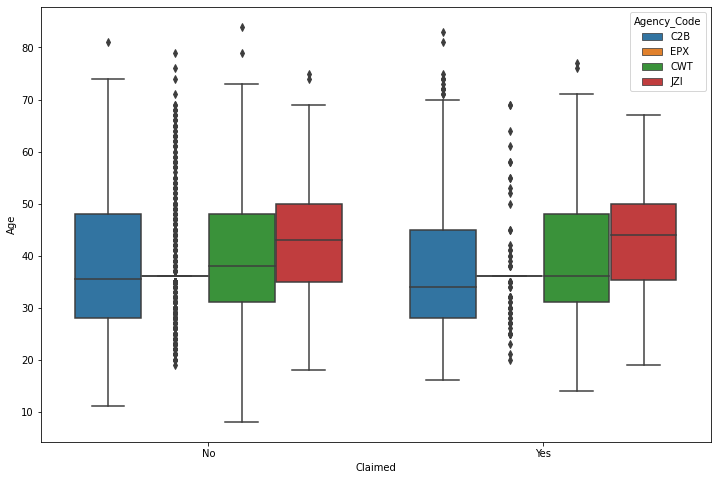

In [197]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Agency_Code',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

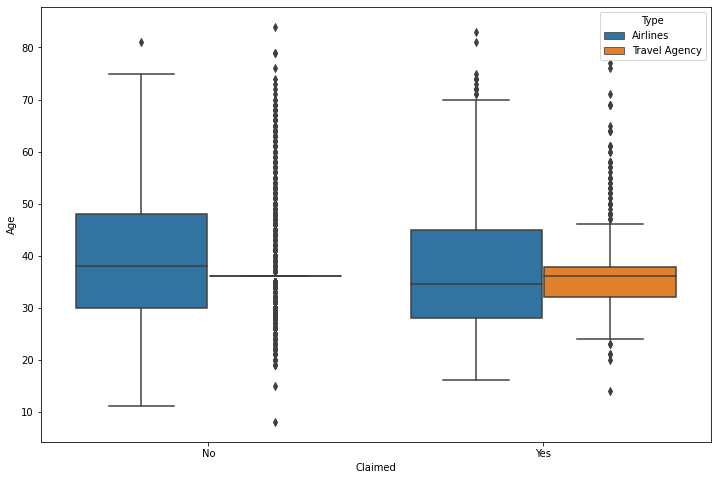

In [198]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Type',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

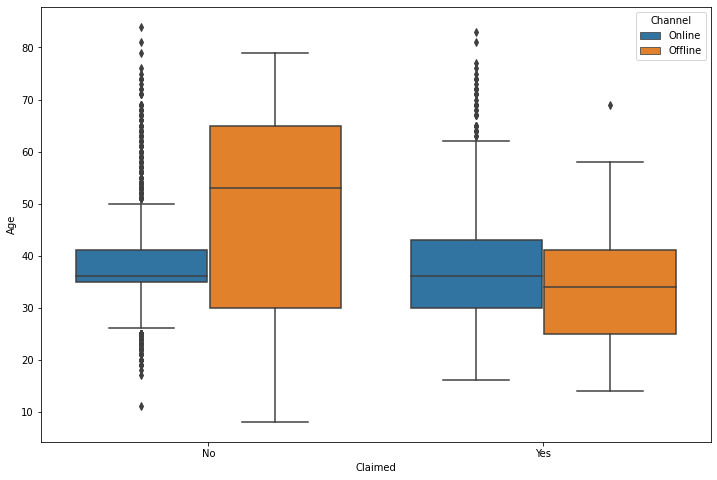

In [199]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Channel',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

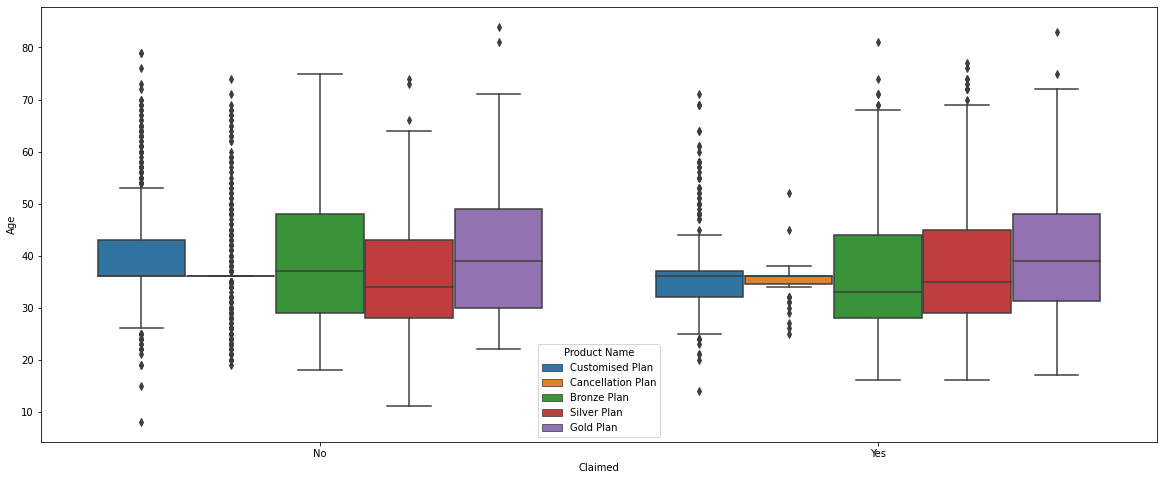

In [200]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(x='Claimed', y='Age', hue='Product Name',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

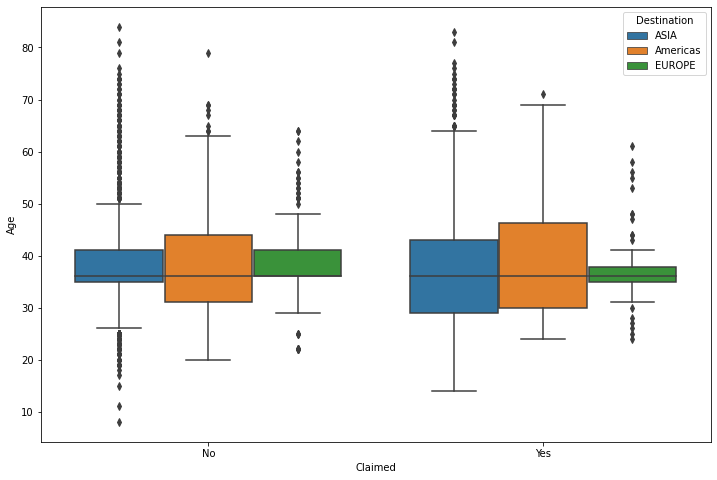

In [201]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Age', hue='Destination',data=df2)

<AxesSubplot:xlabel='Duration', ylabel='Claimed'>

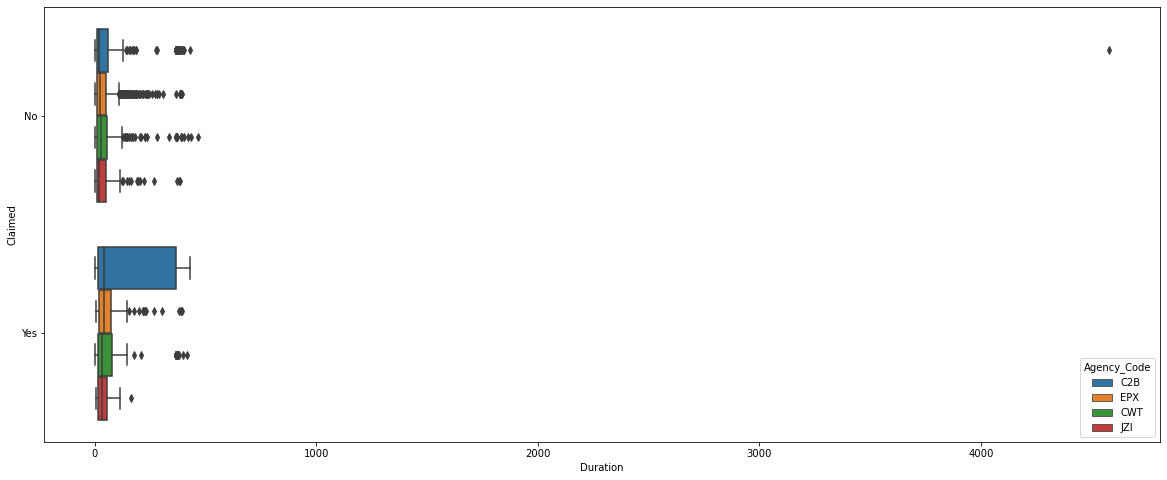

In [202]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Agency_Code',data=df2)

<AxesSubplot:xlabel='Duration', ylabel='Claimed'>

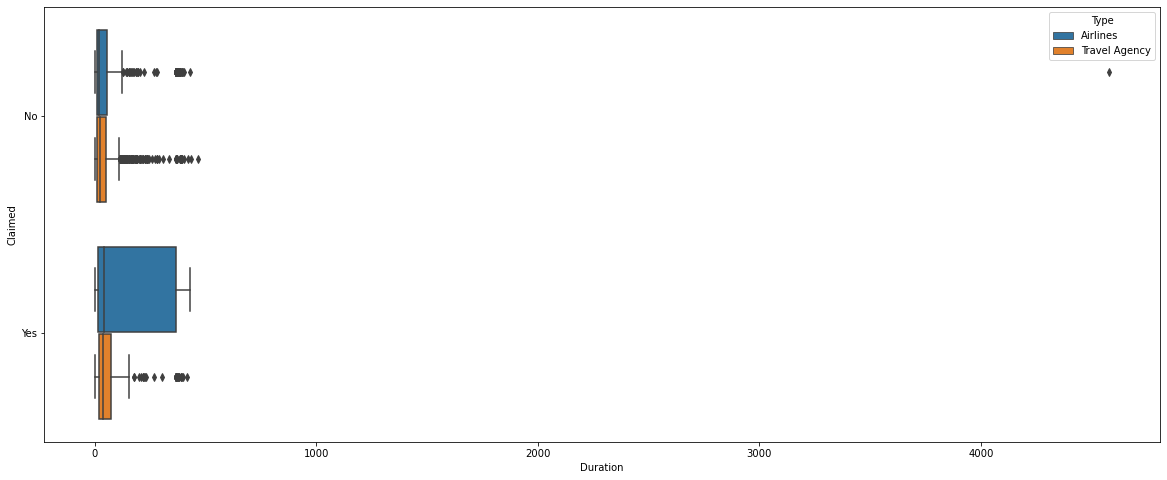

In [203]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Type',data=df2)

<AxesSubplot:xlabel='Duration', ylabel='Claimed'>

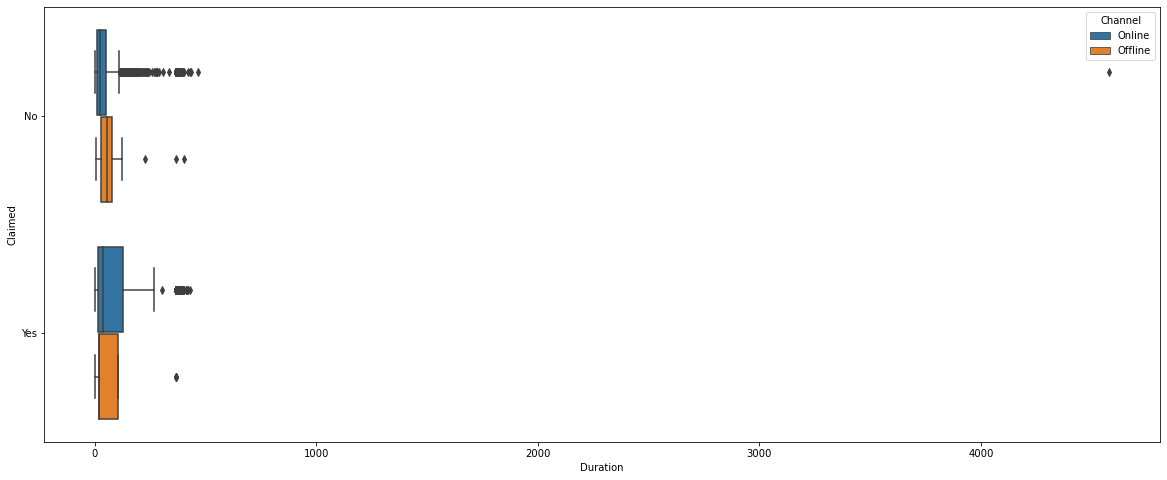

In [204]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Channel',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Duration'>

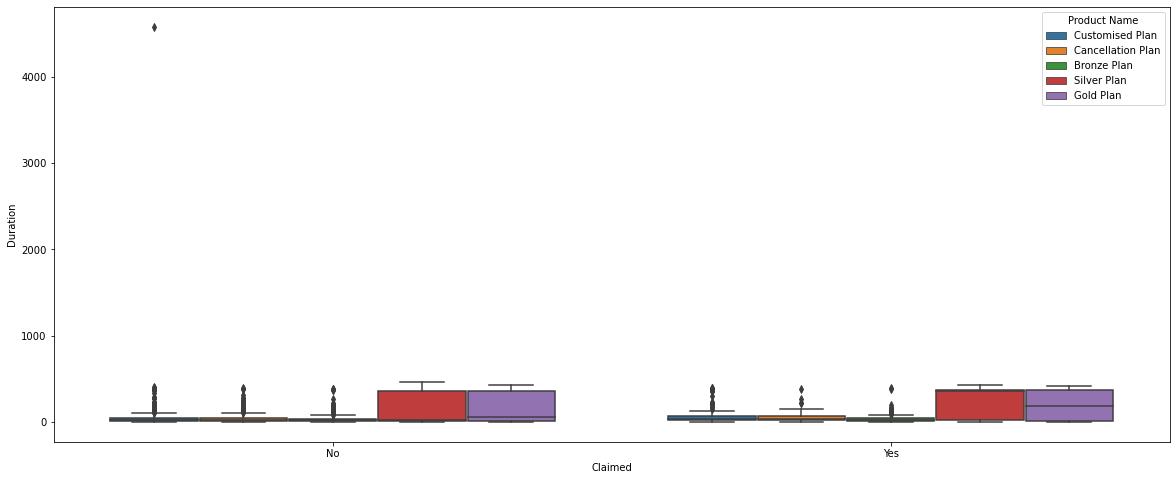

In [205]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(x='Claimed', y='Duration', hue='Product Name',data=df2)

<AxesSubplot:xlabel='Duration', ylabel='Claimed'>

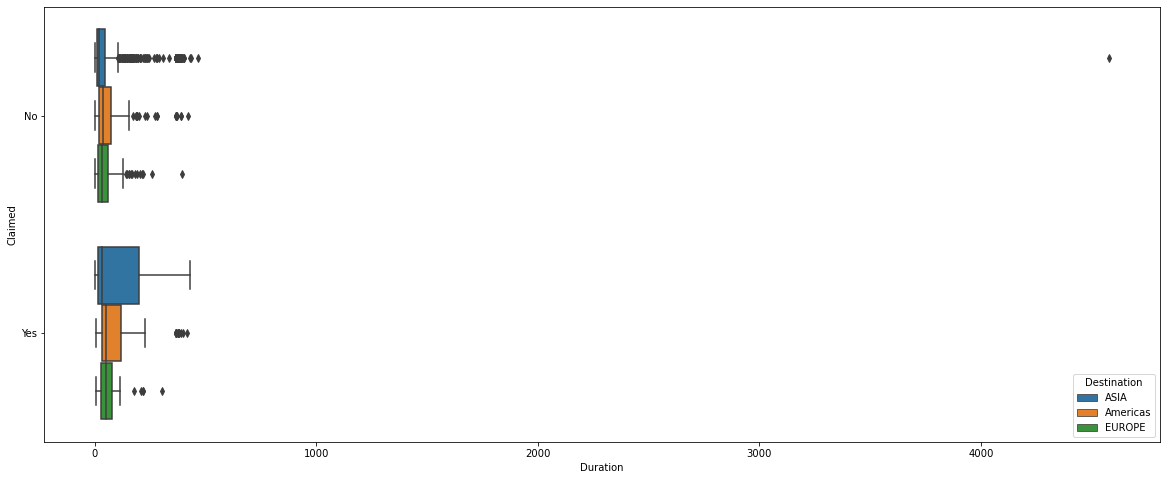

In [206]:
fig = plt.subplots(figsize=(20,8))
sns.boxplot(y='Claimed', x='Duration', hue='Destination',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Sales'>

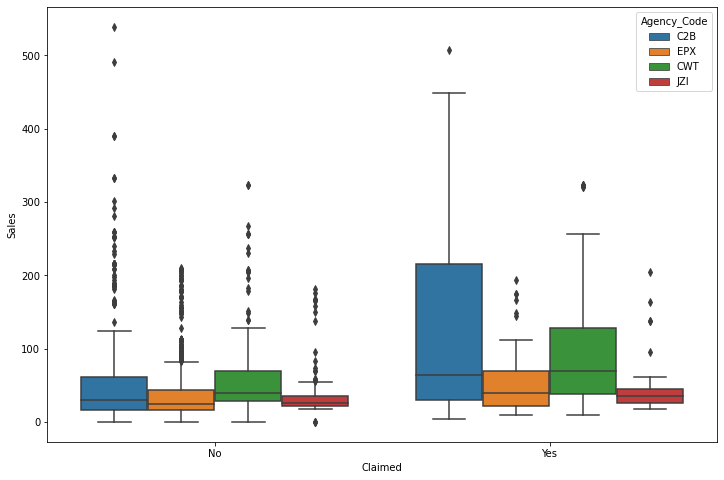

In [207]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Agency_Code',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Sales'>

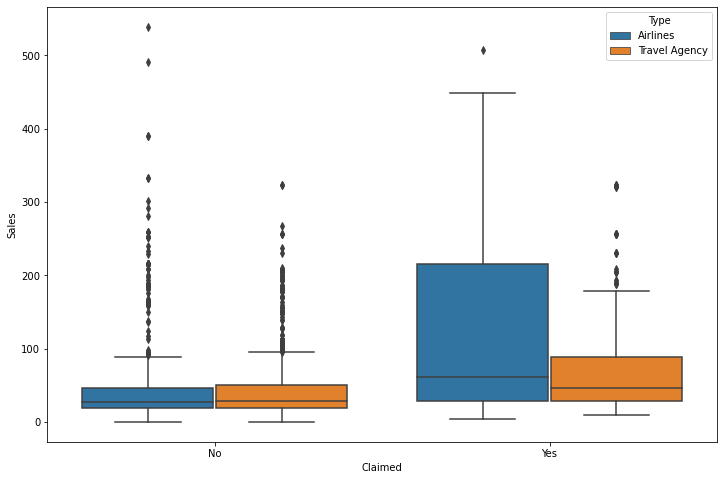

In [208]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Type',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Sales'>

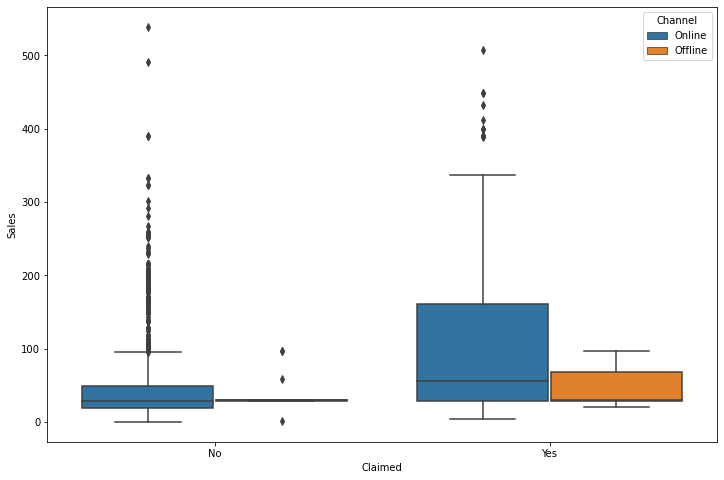

In [209]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Channel',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Sales'>

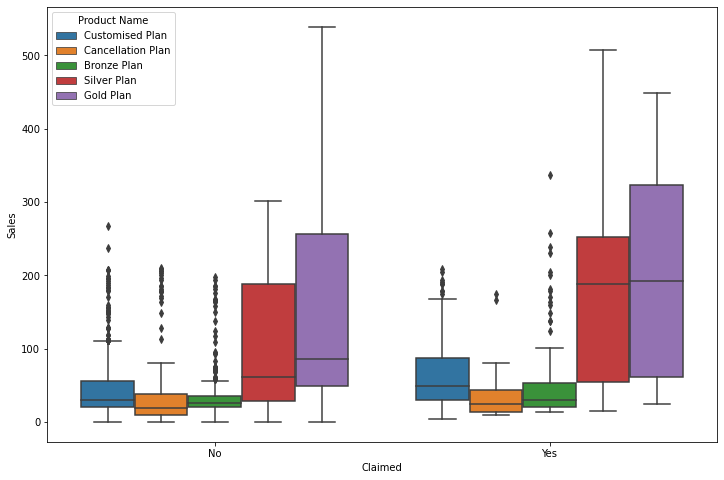

In [210]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Product Name',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Sales'>

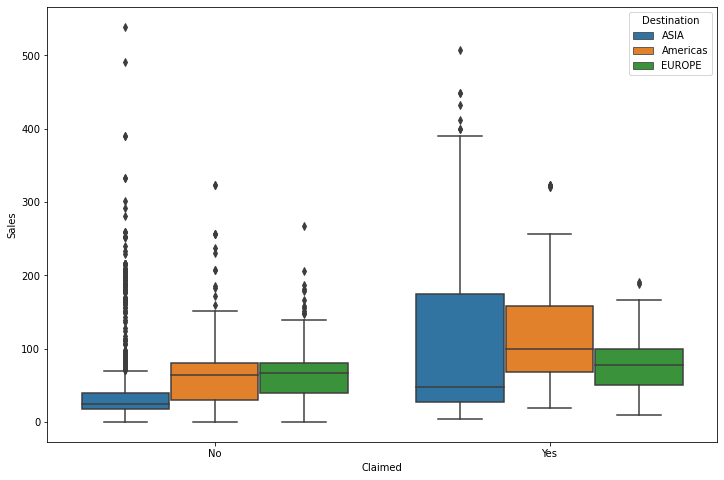

In [211]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Sales', hue='Destination',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Commision'>

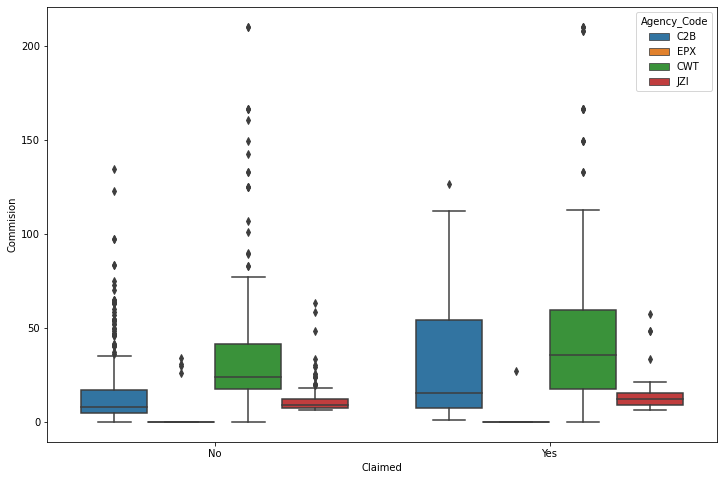

In [212]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Agency_Code',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Commision'>

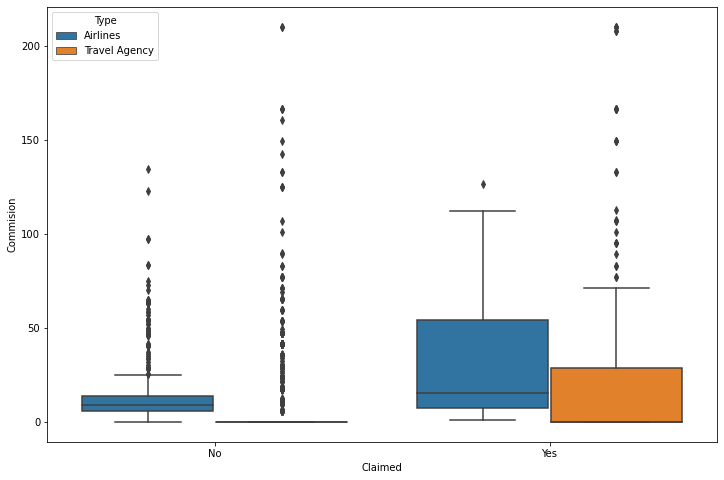

In [213]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Type',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Commision'>

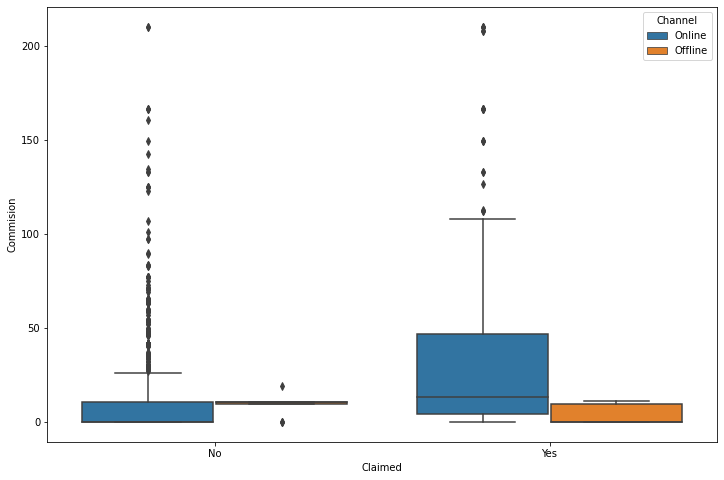

In [214]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Channel',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Commision'>

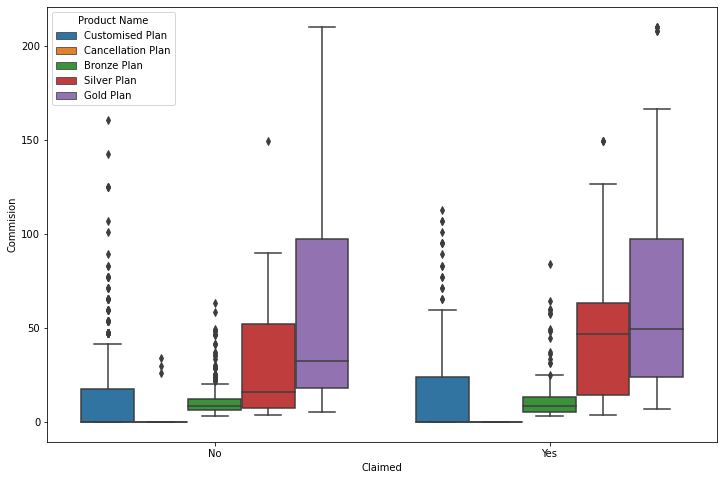

In [215]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Product Name',data=df2)

<AxesSubplot:xlabel='Claimed', ylabel='Commision'>

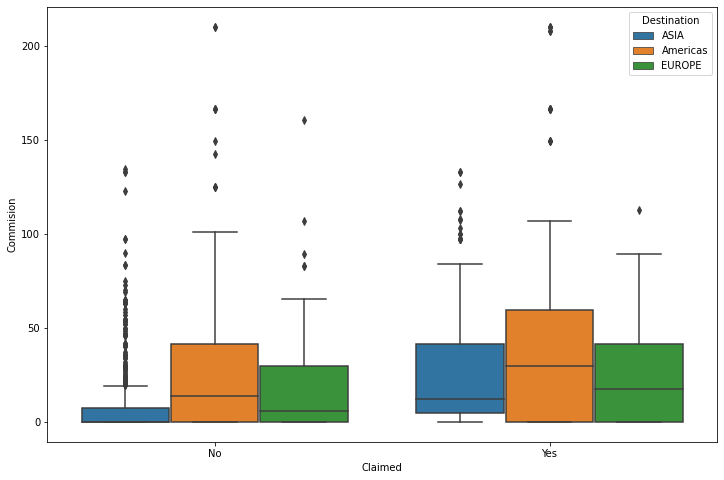

In [216]:
fig = plt.subplots(figsize=(12,8))
sns.boxplot(x='Claimed', y='Commision', hue='Destination',data=df2)

# 2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [217]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# convert all object type to categorical

In [218]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [219]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [220]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [221]:
print('Agency \n',df2.Agency_Code.value_counts())
print('\n')
print('Tour Type \n',df2.Type.value_counts())
print('\n')
print('Channel \n',df2.Channel.value_counts())
print('\n')
print('Product \n',df2['Product Name'].value_counts())
print('\n')
print('Destination \n',df2.Destination.value_counts())
print('\n')
print('Claimed Status \n',df2.Claimed.value_counts())

Agency 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Tour Type 
 1    1837
0    1163
Name: Type, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product 
 2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


Claimed Status 
 0    2076
1     924
Name: Claimed, dtype: int64


# Proportion of target variable

In [222]:
df2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

#  Extracting the target column into separate vectors for training set and test set

In [223]:
X = df2.drop("Claimed", axis=1)

y = df2.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


# Splitting data into training and test set

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

# Checking the dimensions of the training and test data

In [225]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total observations is', X_train.shape[0]+X_test.shape[0])

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total observations is 3000


In [226]:
X_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
311,36,2,1,0.00,1,39,26.0,1,0
1025,28,0,0,28.13,1,34,112.5,4,0
1587,39,3,0,7.70,1,11,22.0,0,0
2941,22,0,0,5.88,1,12,23.5,0,0
2980,55,1,1,23.76,1,8,39.6,2,1


# Decision Tree classifier

In [227]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [228]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [229]:
from sklearn import tree

train_char_label = ['No', 'Yes']
HR_Tree_File = open('hr_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=HR_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

HR_Tree_File.close()

In [230]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [231]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [232]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 75}

In [233]:
best_grid = grid_search.best_estimator_

# Prediction on the train data

In [234]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [235]:
from sklearn.metrics import classification_report

In [236]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1464
           1       0.68      0.57      0.62       636

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


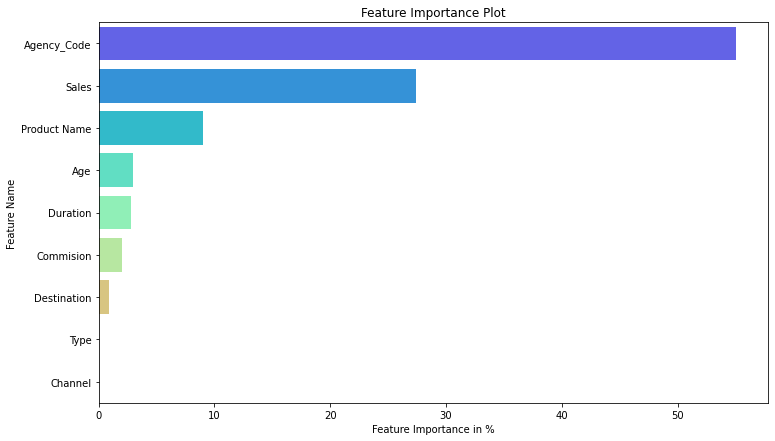

In [237]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [238]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                   Imp
Agency_Code   0.550452
Sales         0.274005
Product Name  0.089727
Age           0.029377
Duration      0.027699
Commision     0.019989
Destination   0.008751
Type          0.000000
Channel       0.000000


In [239]:
from sklearn.metrics import confusion_matrix

In [240]:
confusion_matrix(train_labels, ytrain_predict)

array([[1291,  173],
       [ 272,  364]], dtype=int64)

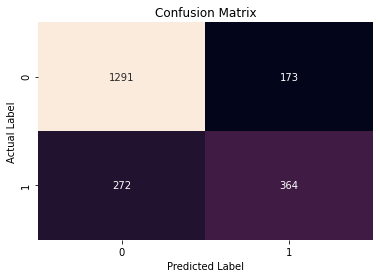

In [241]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [242]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1291
False Positives:  173
False Negatives:  272
True Positives:  364


In [243]:
#Train Data Accuracy
best_grid.score(X_train,train_labels) 

0.7880952380952381

AUC: 0.837


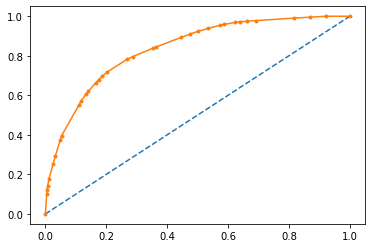

In [244]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Prediction on the test data

In [245]:
confusion_matrix(test_labels, ytest_predict)

array([[548,  64],
       [134, 154]], dtype=int64)

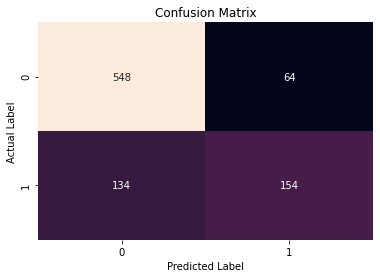

In [246]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [247]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  548
False Positives:  64
False Negatives:  134
True Positives:  154


In [248]:
#Test Data Accuracy
best_grid.score(X_test,test_labels) 

0.78

In [249]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       612
           1       0.71      0.53      0.61       288

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



AUC: 0.817


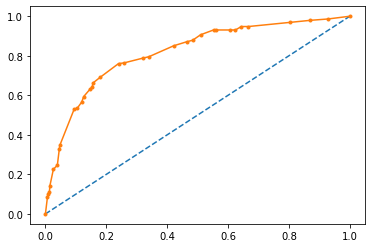

In [250]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Building a Random Forest Classifier Model and fit it on the Training Set

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [252]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [20, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [101, 301]})

In [253]:
grid_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 25,
 'min_samples_split': 75,
 'n_estimators': 301}

In [254]:
best_grid = grid_search.best_estimator_

# Prediction on train data

In [255]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [256]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1464
           1       0.71      0.54      0.61       636

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.79      0.79      0.78      2100



C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


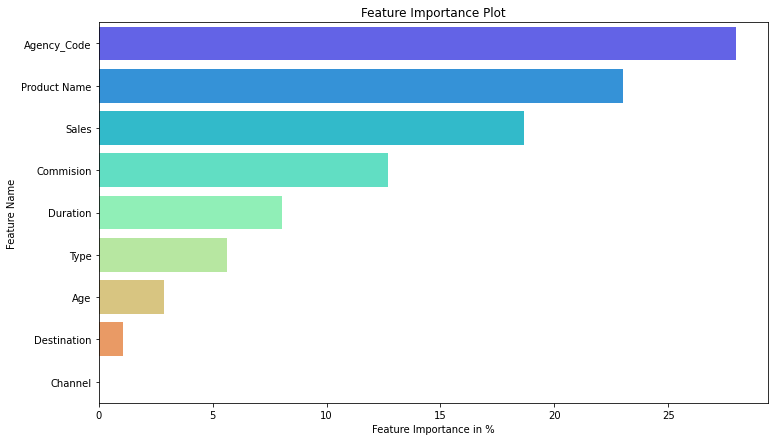

In [257]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [258]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.279781
Product Name  0.230239
Sales         0.186664
Commision     0.127123
Duration      0.080287
Type          0.056357
Age           0.028688
Destination   0.010862
Channel       0.000000


In [259]:
confusion_matrix(train_labels, ytrain_predict)

array([[1323,  141],
       [ 292,  344]], dtype=int64)

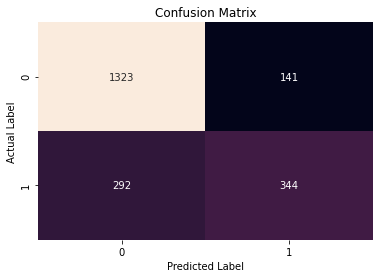

In [260]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [261]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1323
False Positives:  141
False Negatives:  292
True Positives:  344


In [262]:
#Train Data Accuracy
best_grid.score(X_train,train_labels) 

0.7938095238095239

AUC: 0.836


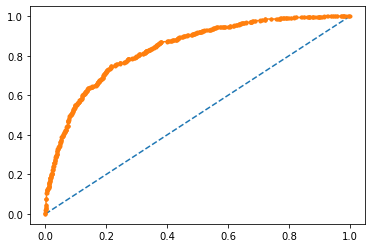

In [263]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Prediction on the test data

In [264]:
confusion_matrix(test_labels, ytest_predict)

array([[563,  49],
       [136, 152]], dtype=int64)

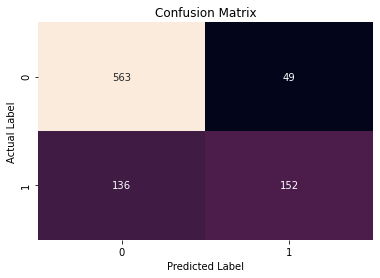

In [265]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [266]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  563
False Positives:  49
False Negatives:  136
True Positives:  152


In [267]:
#Test Data Accuracy
best_grid.score(X_test,test_labels) 

0.7944444444444444

In [268]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       612
           1       0.76      0.53      0.62       288

    accuracy                           0.79       900
   macro avg       0.78      0.72      0.74       900
weighted avg       0.79      0.79      0.78       900



AUC: 0.842


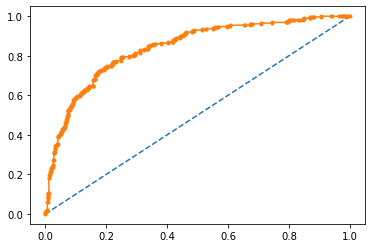

In [269]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# MLP Classifier (Artificial Neural Network)

In [270]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [271]:
param_grid = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01,0.001],
    'max_iter' : [500]
}

rfcl = MLPClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [272]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [500],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [273]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 500,
 'solver': 'sgd',
 'tol': 0.001}

In [274]:
best_grid = grid_search.best_estimator_

# Predict Train set

In [275]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [276]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1464
           1       0.70      0.40      0.51       636

    accuracy                           0.77      2100
   macro avg       0.74      0.66      0.68      2100
weighted avg       0.76      0.77      0.75      2100



In [277]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       612
           1       0.75      0.35      0.48       288

    accuracy                           0.76       900
   macro avg       0.75      0.65      0.66       900
weighted avg       0.75      0.76      0.73       900



In [278]:
confusion_matrix(train_labels, ytrain_predict)

array([[1357,  107],
       [ 381,  255]], dtype=int64)

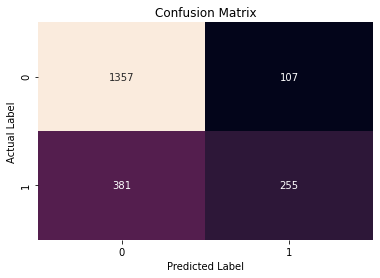

In [279]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [280]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(train_labels, ytrain_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1357
False Positives:  107
False Negatives:  381
True Positives:  255


In [281]:
#Train Data Accuracy
best_grid.score(X_trains,train_labels) 

0.7676190476190476

AUC: 0.790


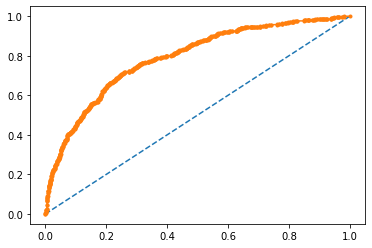

In [282]:
# predict probabilities
probs = best_grid.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Predictions on the test data

In [283]:
confusion_matrix(test_labels, ytest_predict)

array([[578,  34],
       [186, 102]], dtype=int64)

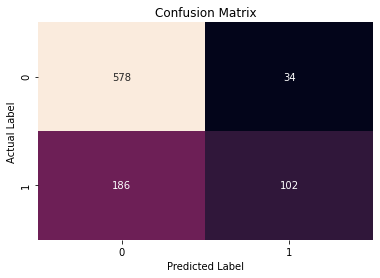

In [284]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [285]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(test_labels, ytest_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  578
False Positives:  34
False Negatives:  186
True Positives:  102


In [286]:
#Test Data Accuracy
best_grid.score(X_tests,test_labels) 

0.7555555555555555

In [287]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       612
           1       0.75      0.35      0.48       288

    accuracy                           0.76       900
   macro avg       0.75      0.65      0.66       900
weighted avg       0.75      0.76      0.73       900



AUC: 0.799


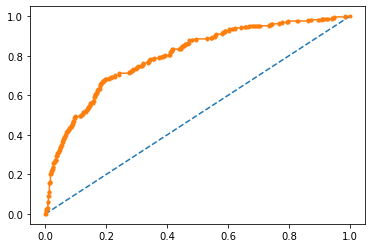

In [288]:
# predict probabilities
probs = best_grid.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()